ACME Medical Insurance Payout 

Kaggle link for the project

https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout

In [6]:
#!pip install pandas-profiling --quiet


In [7]:
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [8]:
# from urllib.request import urlretrieve


In [9]:
# urlretrieve(medical_charges_url, 'medical.csv')


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('expenses.csv')

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Our aim is to find the charges for a new customer, so charges is the Target**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EDA**

In [15]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:xlabel='age', ylabel='Count'>

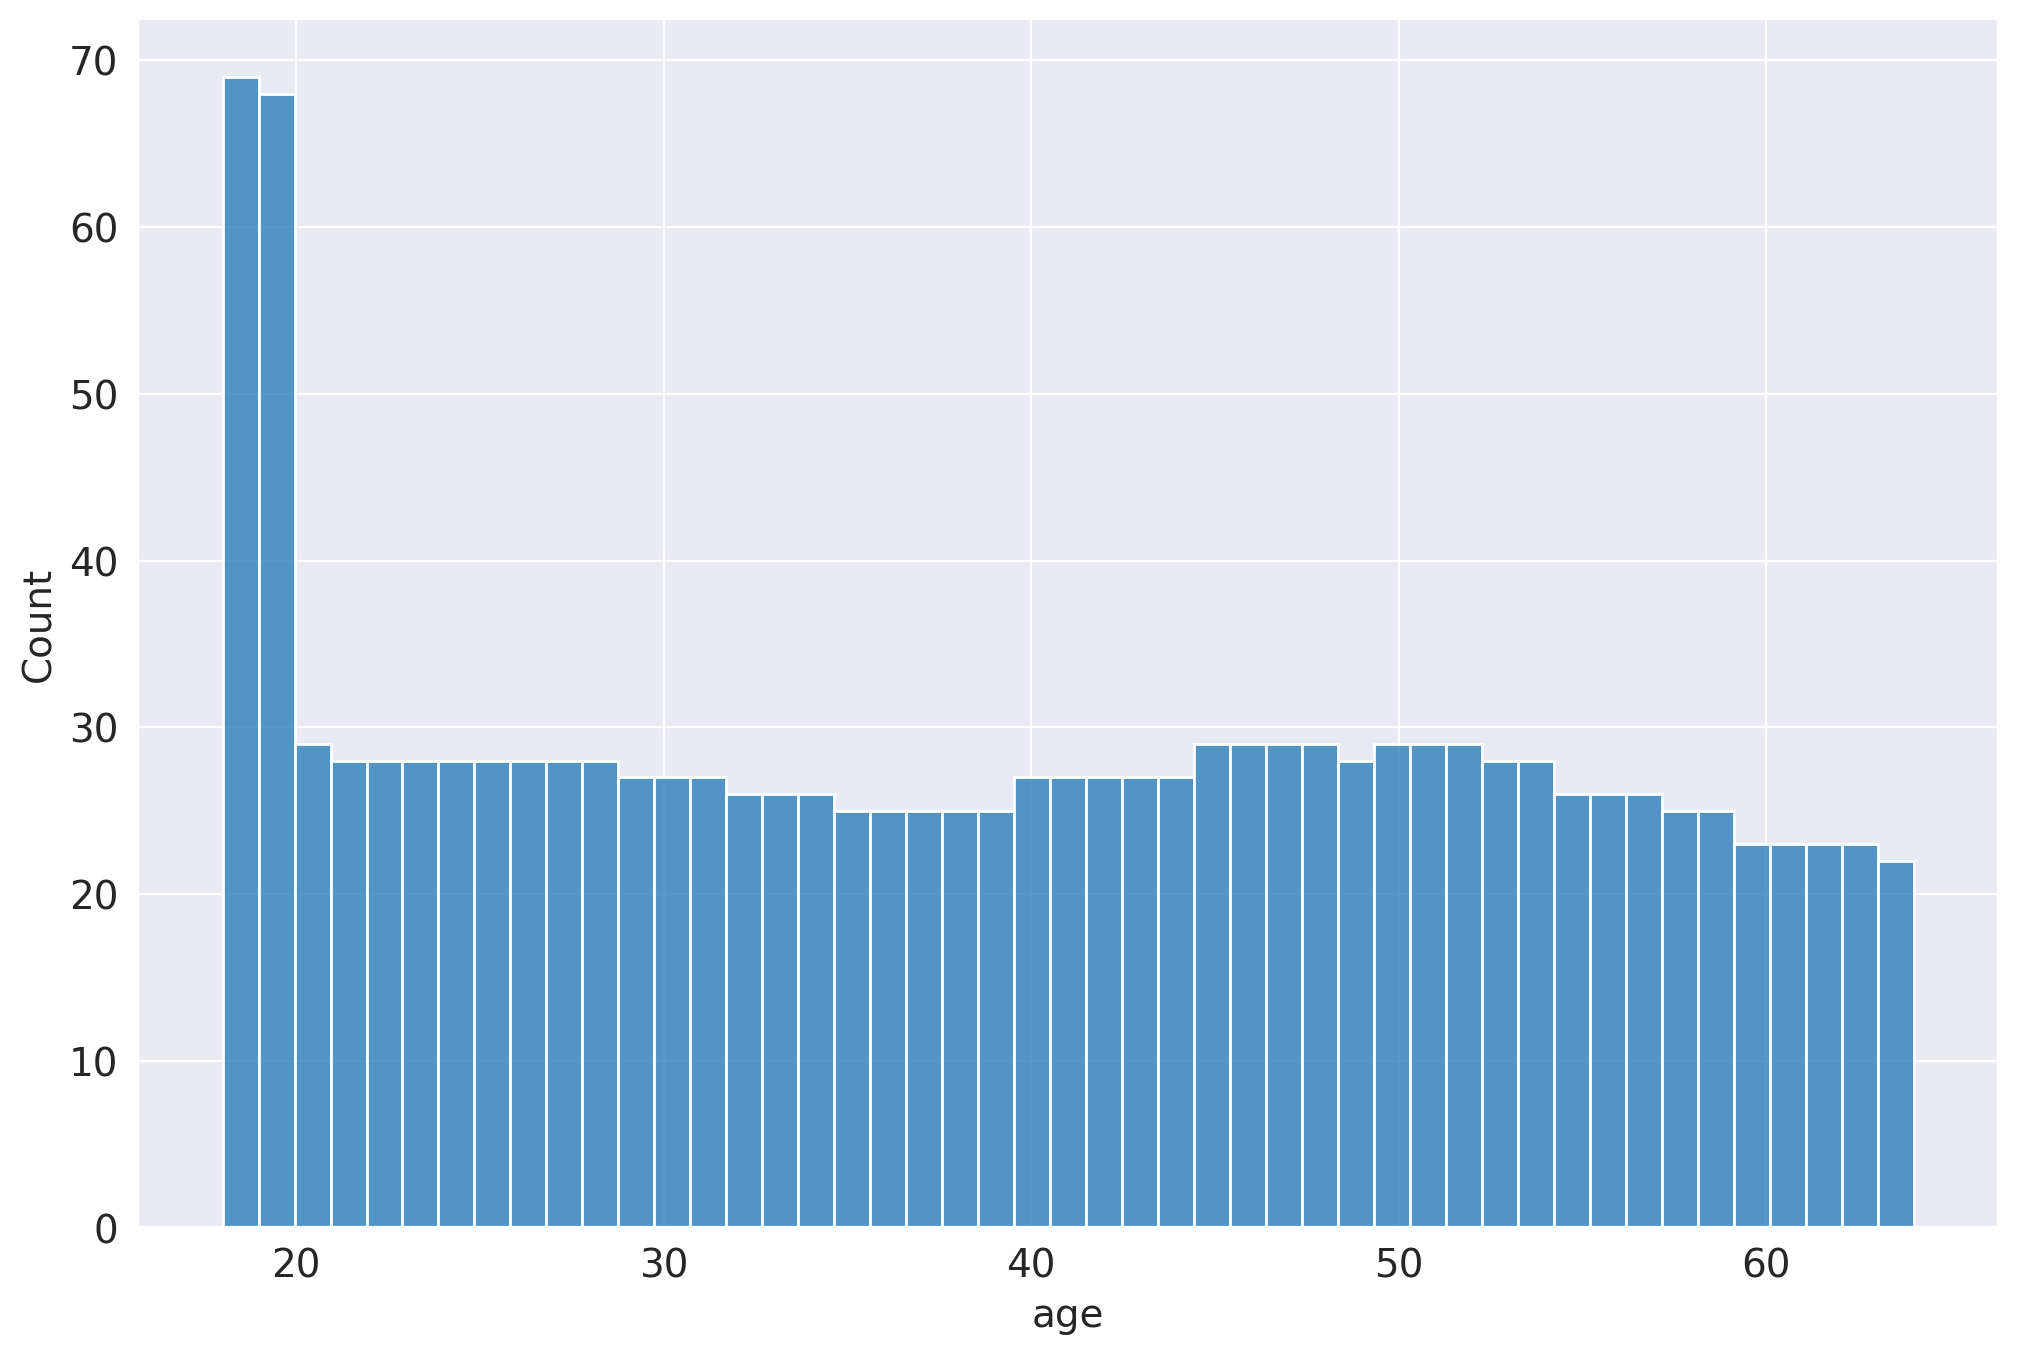

In [17]:
sns.histplot(data=df,x='age',bins=47)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

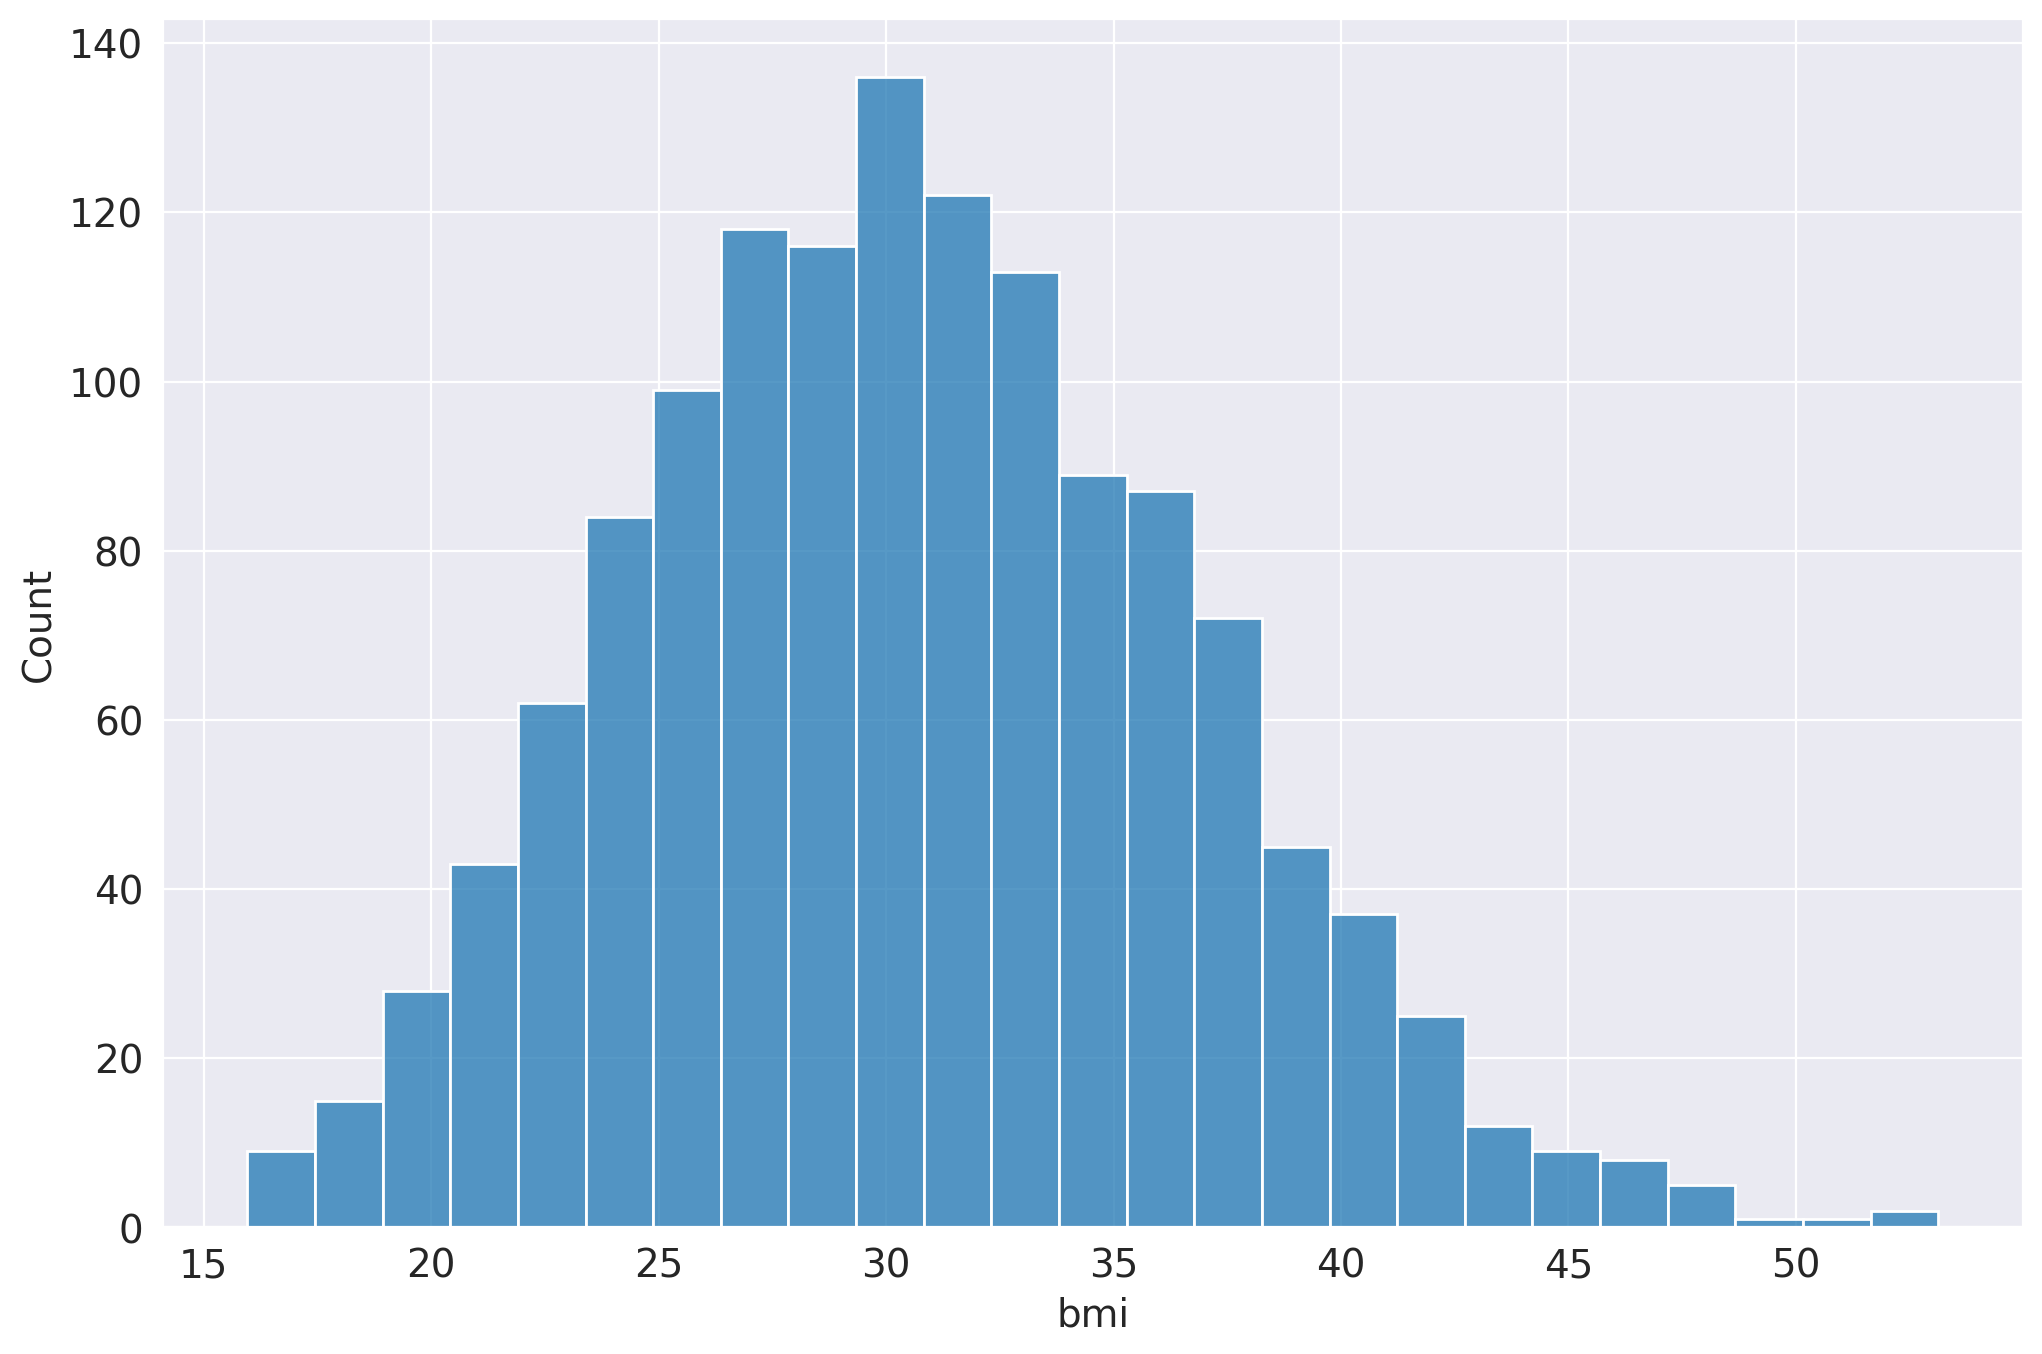

In [18]:
sns.histplot(data=df,x='bmi')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

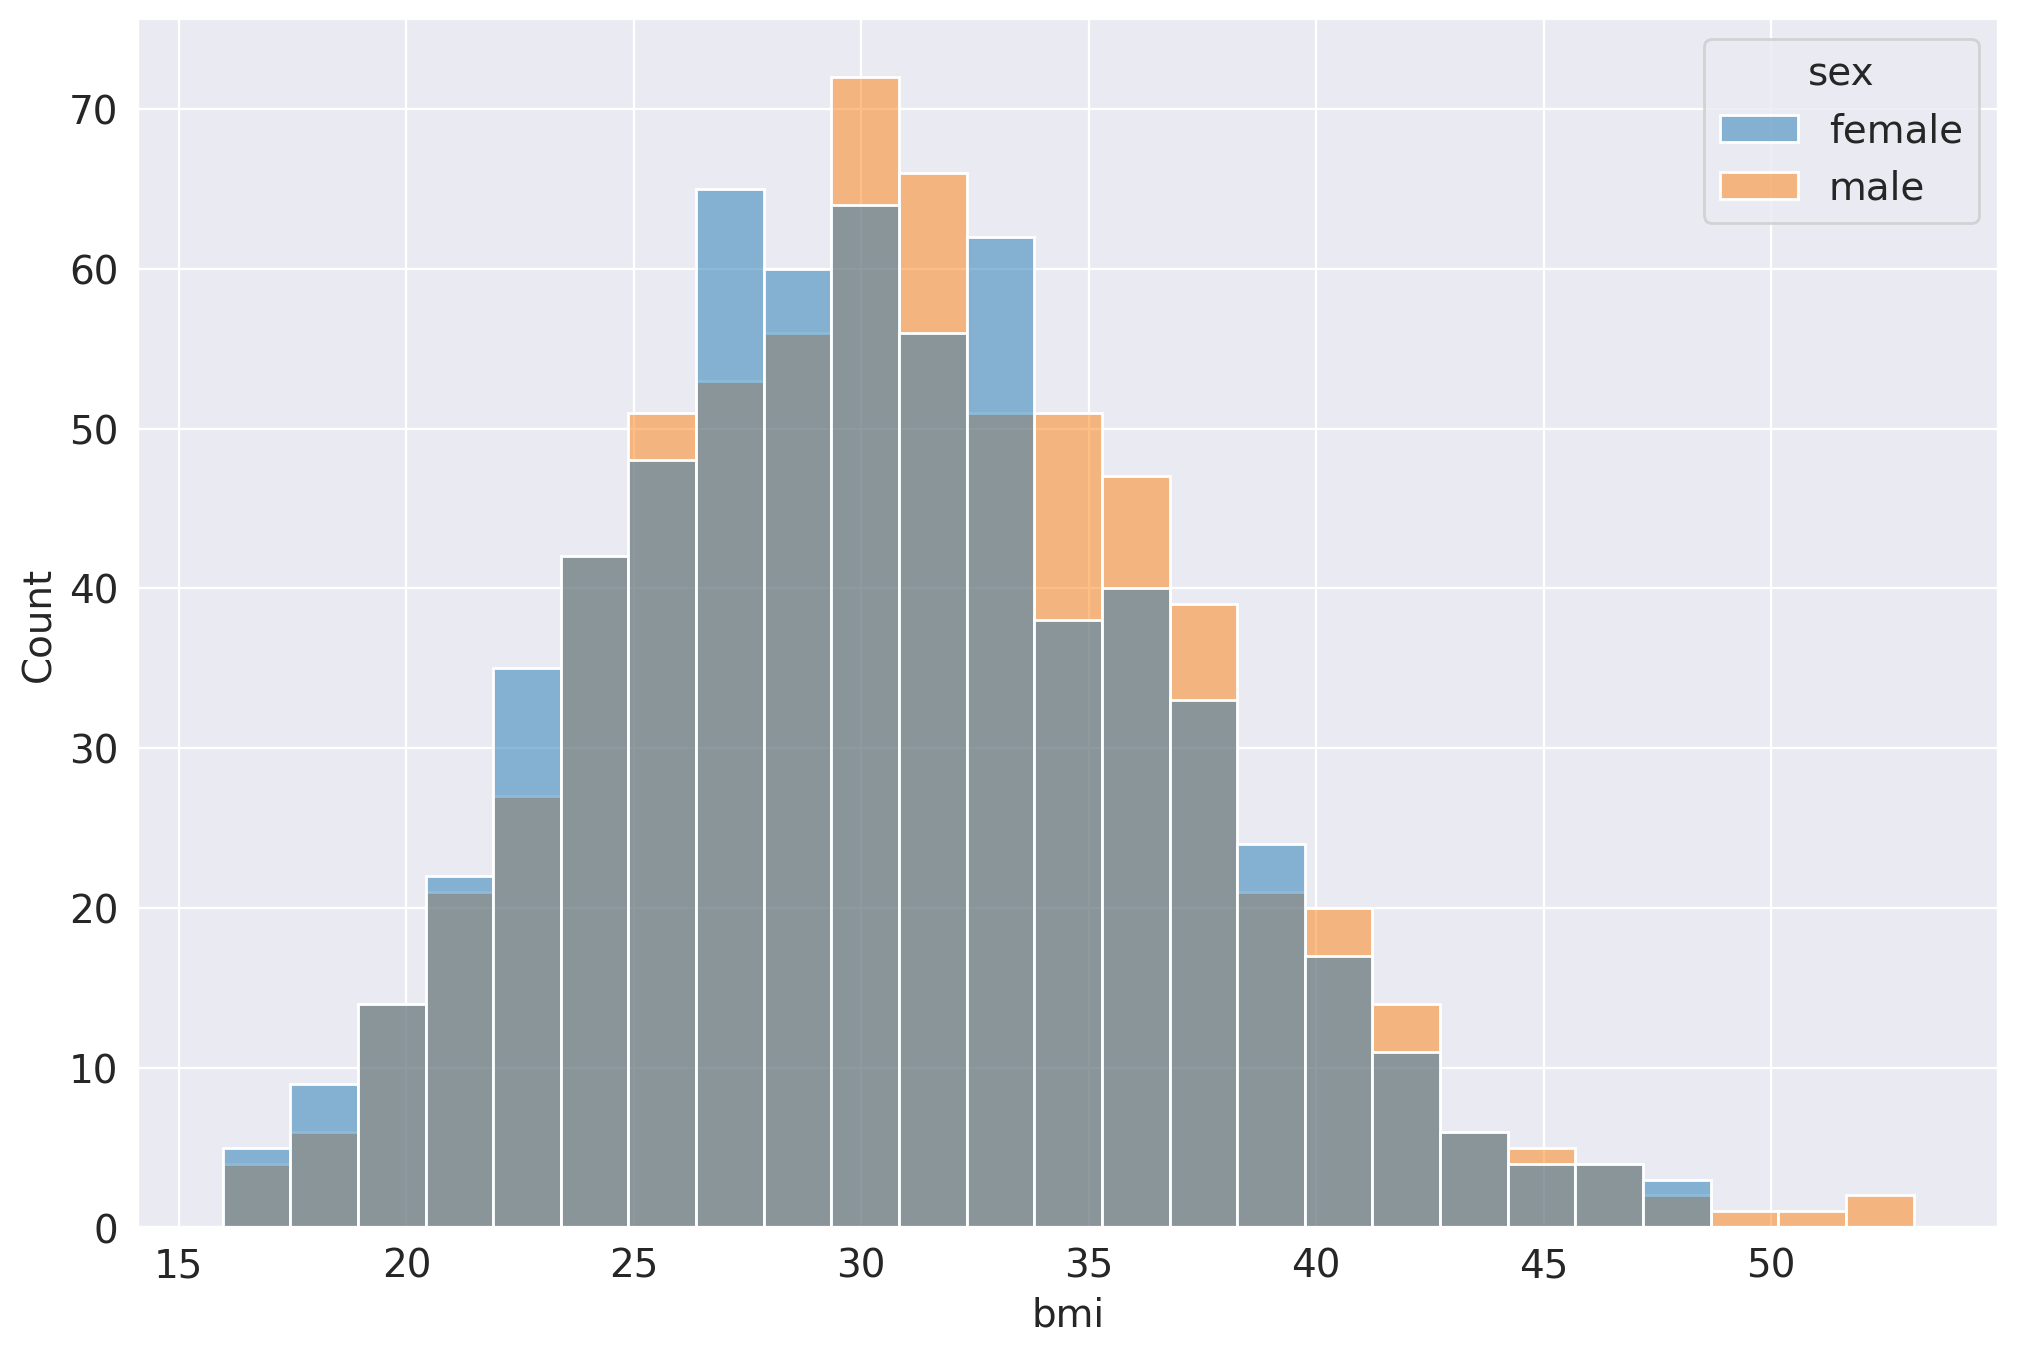

In [19]:
sns.histplot(data=df,x='bmi',hue='sex')

<AxesSubplot:xlabel='charges', ylabel='Count'>

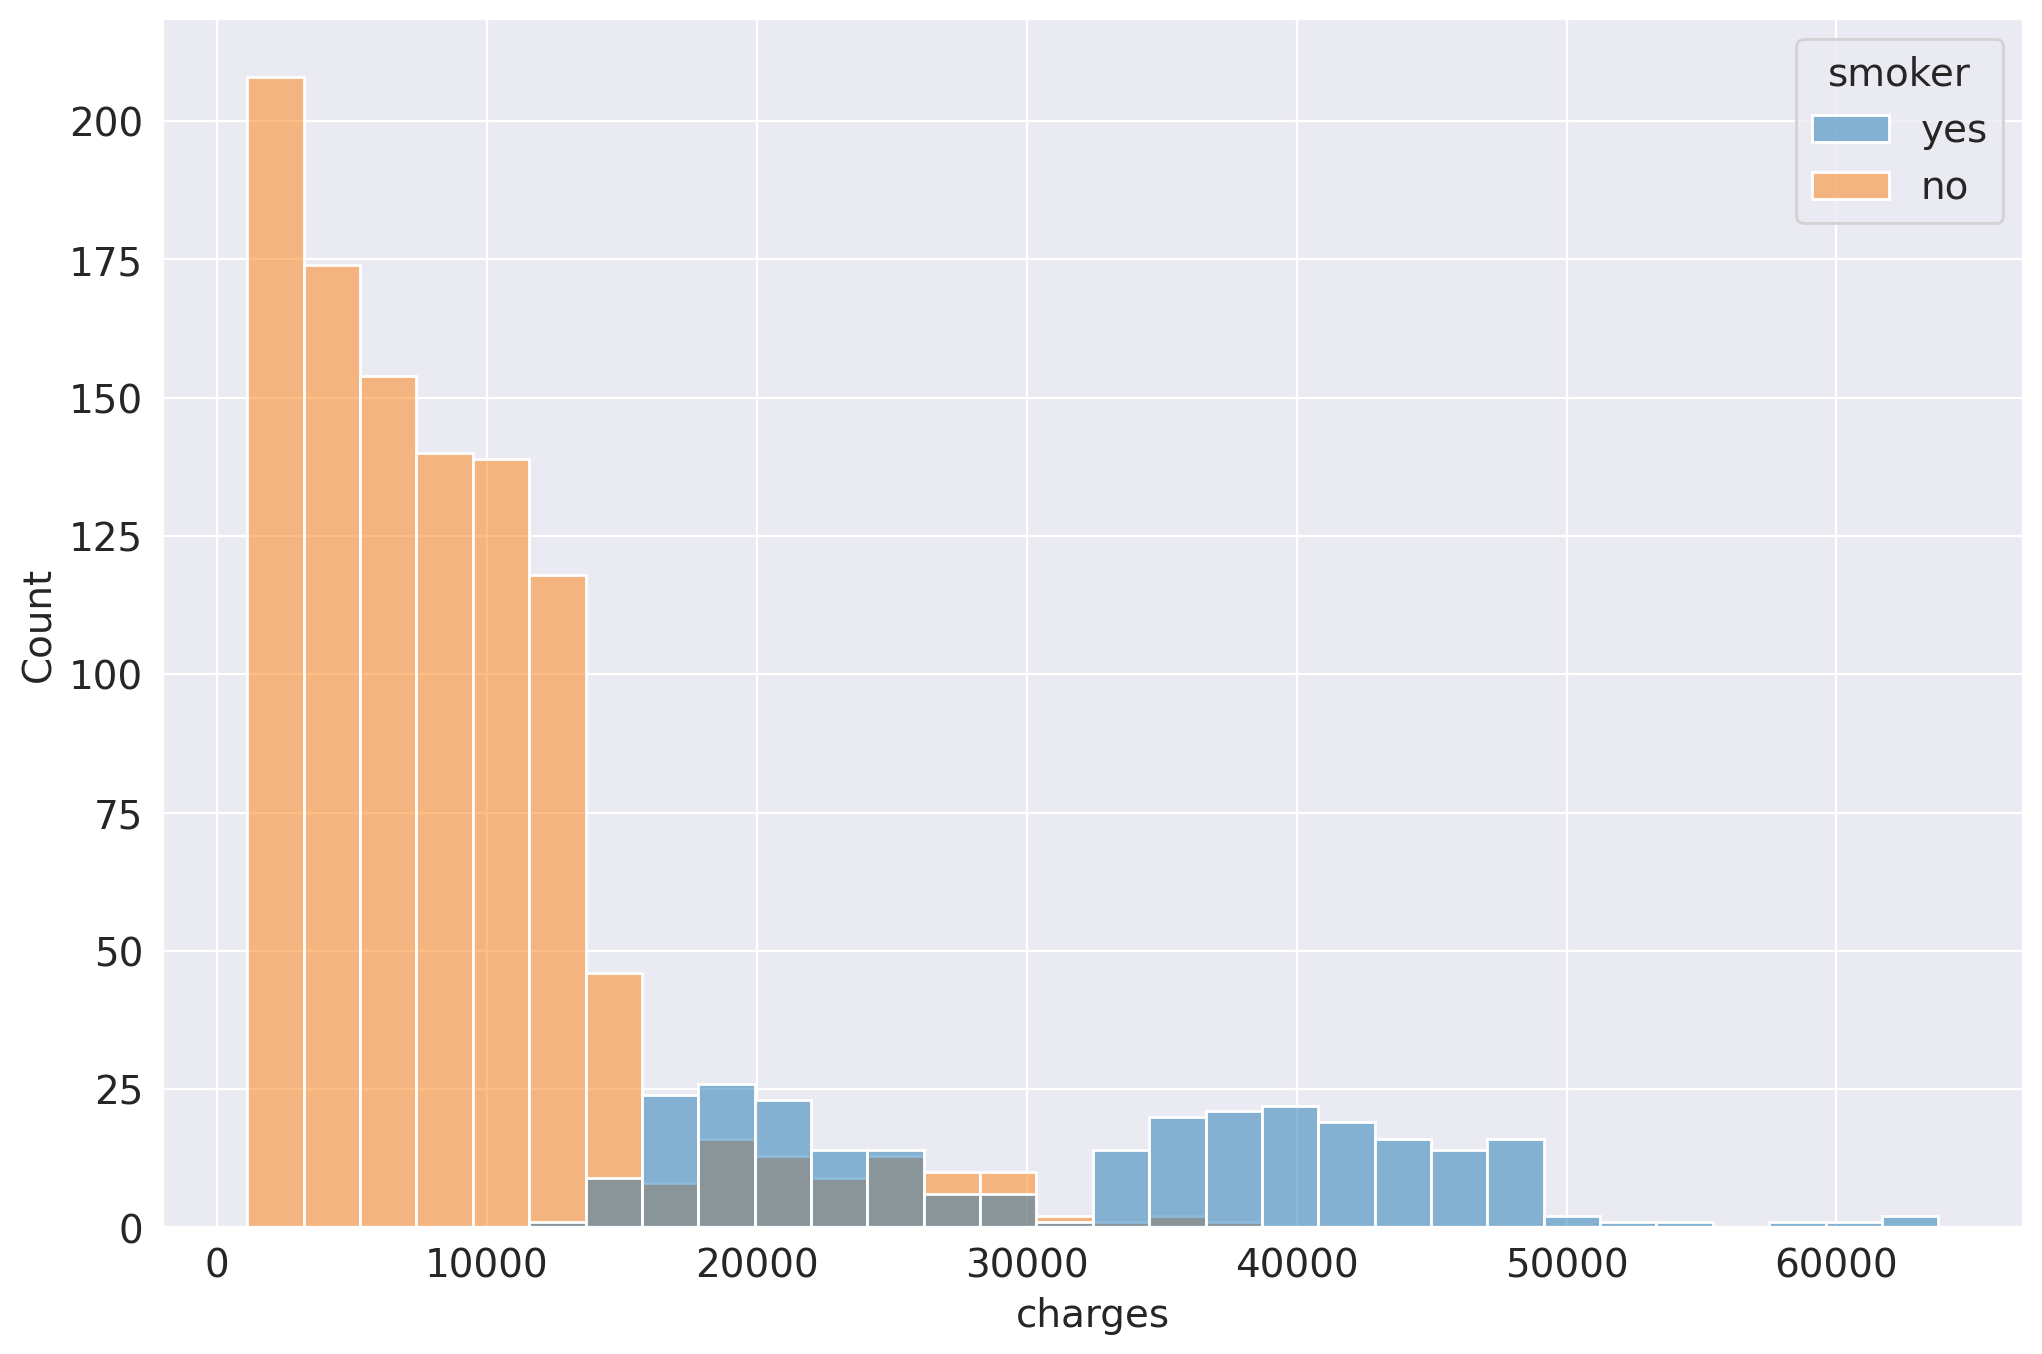

In [20]:
sns.histplot(data=df,x='charges',hue='smoker')

smokers are prone to spend more medical charges

In [21]:
df[df['smoker']=='yes']['charges'].median()   # median amount spent by smokers

34456.348450000005

In [22]:
df[df['smoker']=='no']['charges'].median()    # median amount spent by non-smokers

7345.4053

<AxesSubplot:xlabel='smoker', ylabel='Count'>

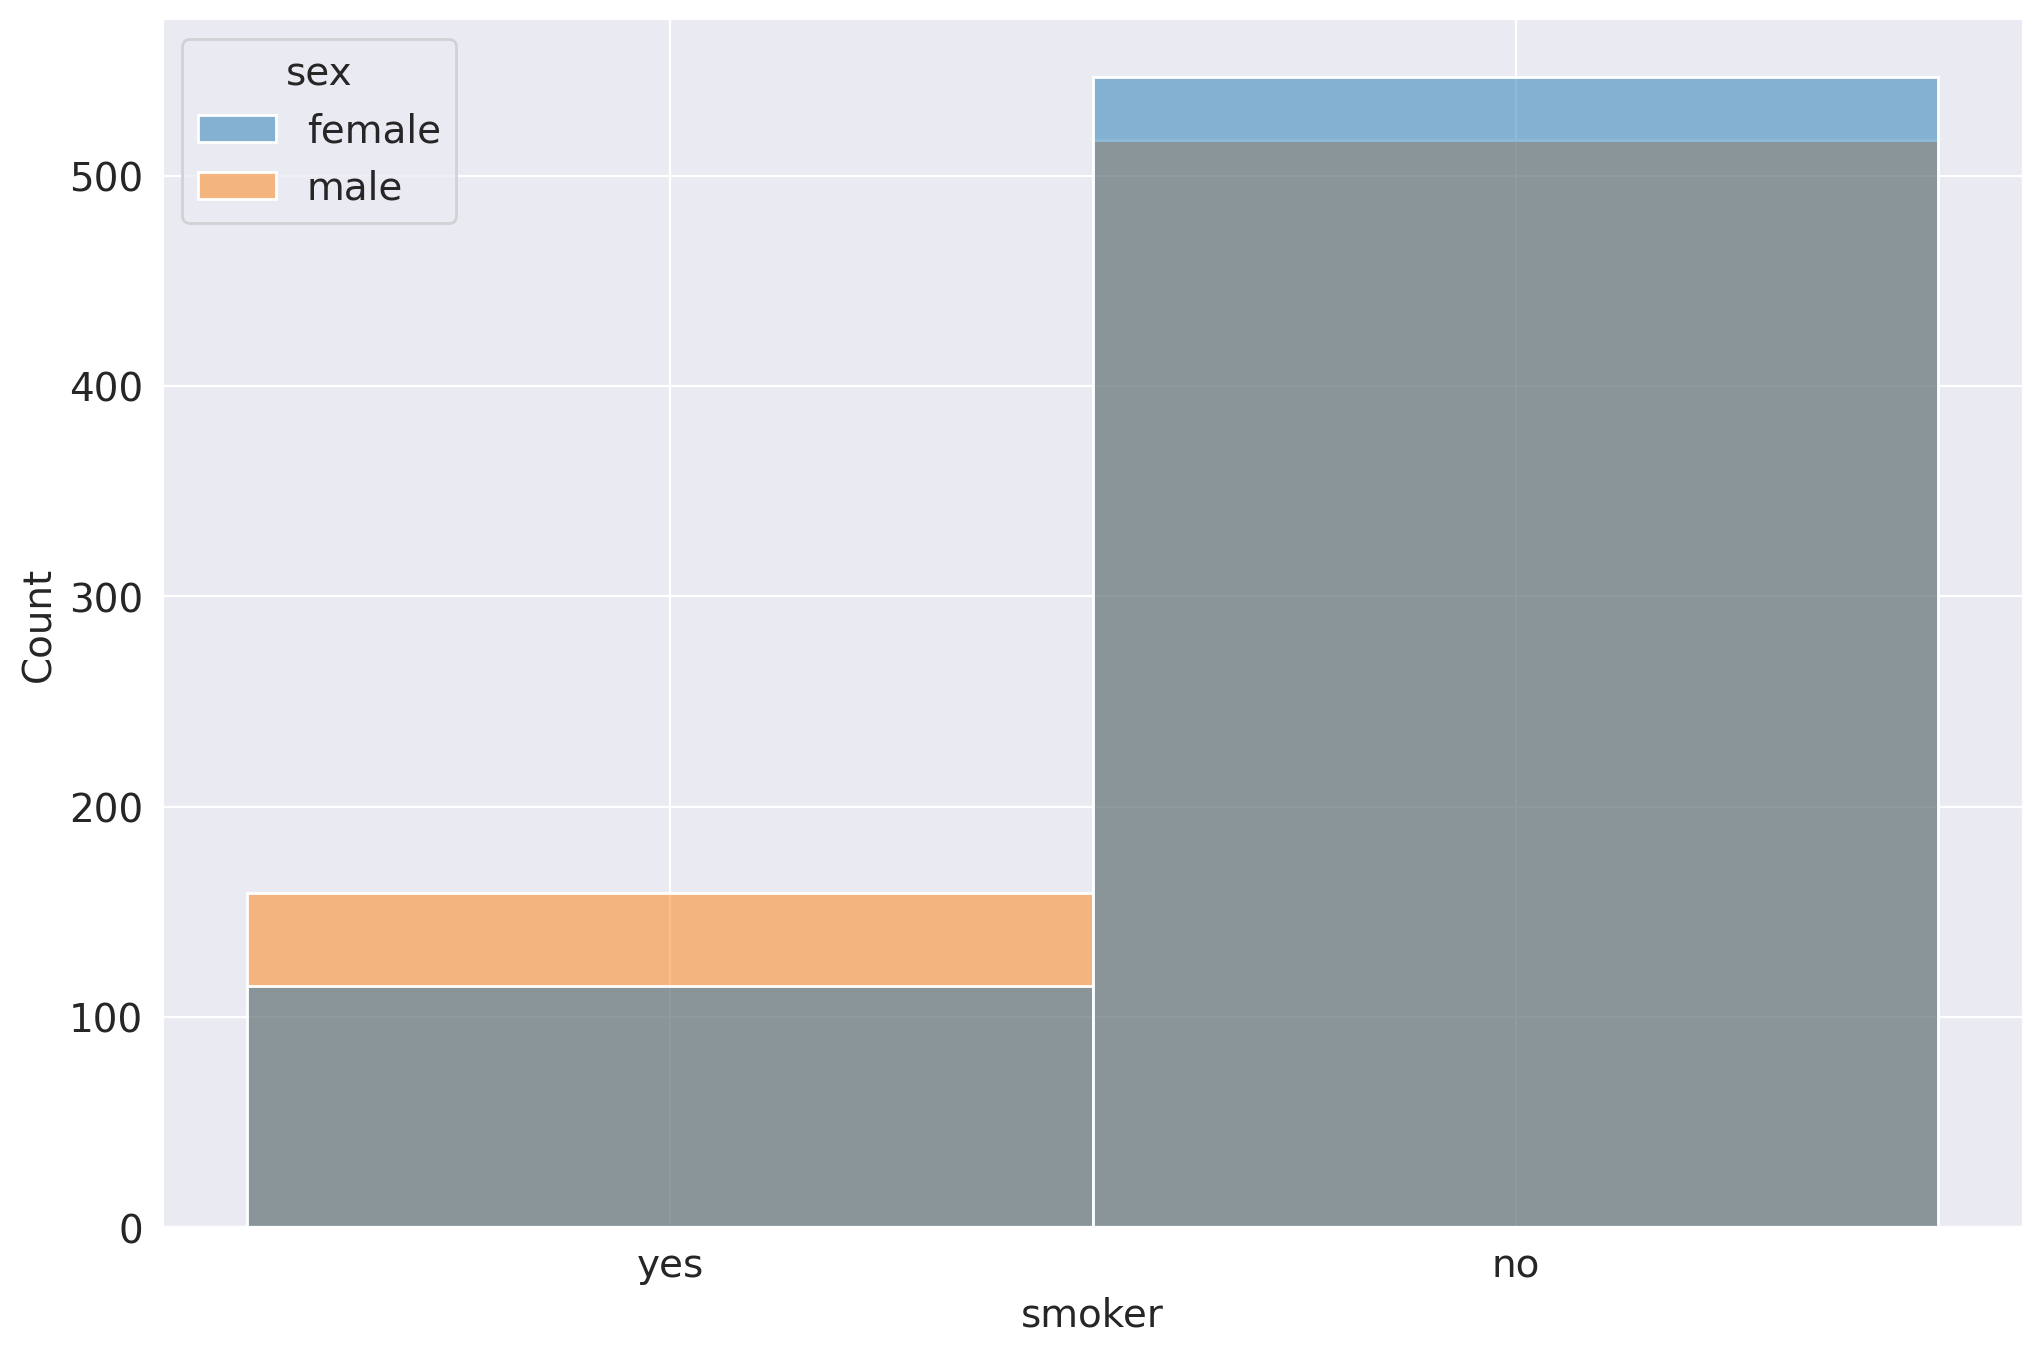

In [23]:
sns.histplot(data=df, x='smoker',hue='sex')

<AxesSubplot:xlabel='sex', ylabel='Count'>

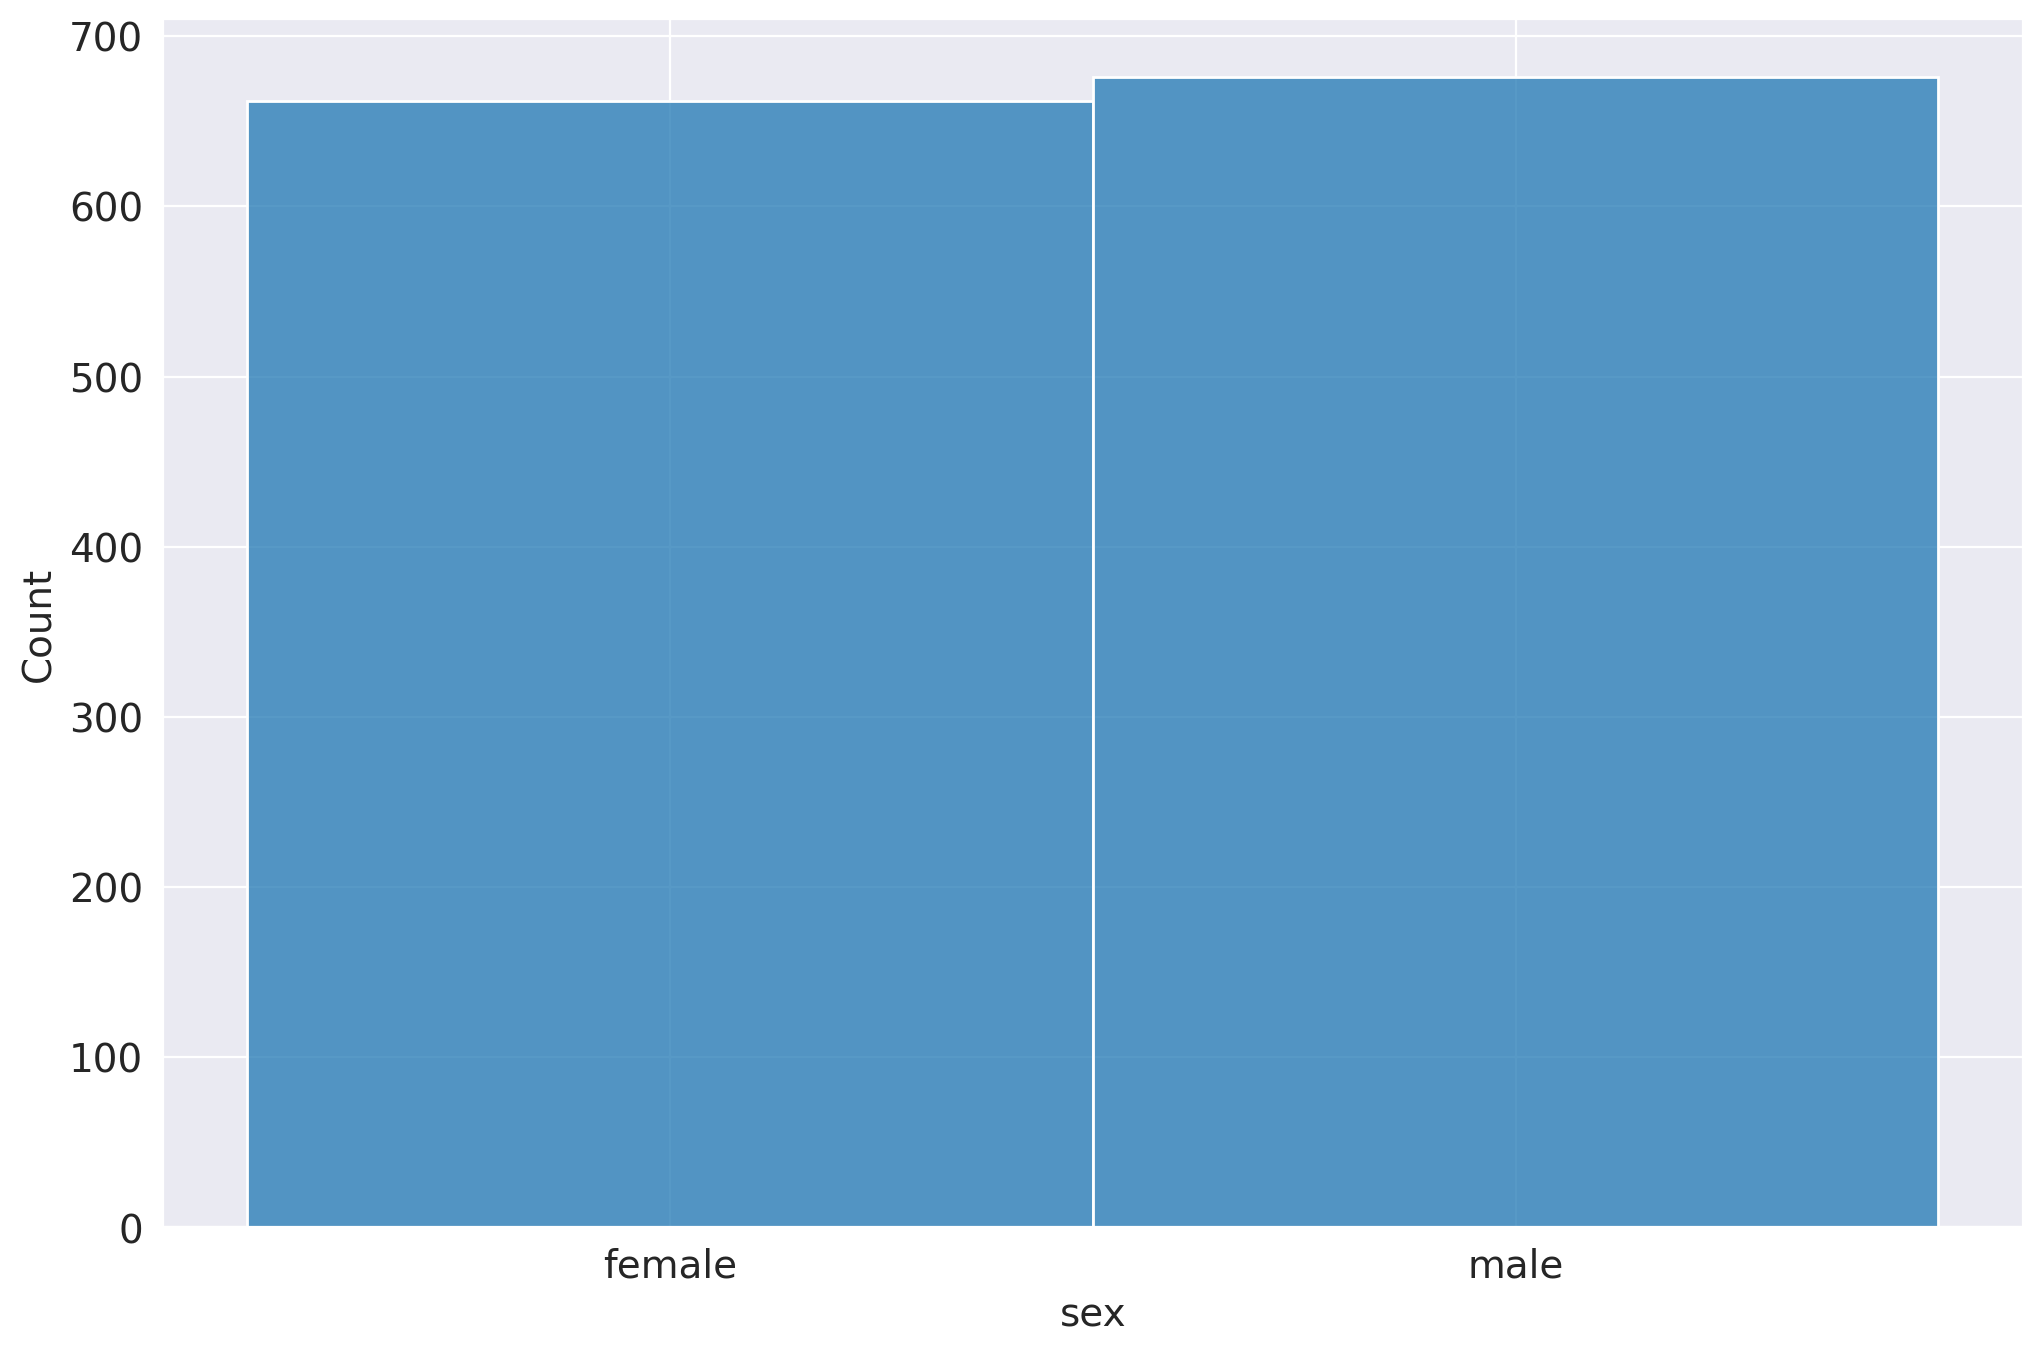

In [24]:
sns.histplot(data=df,x='sex')

<AxesSubplot:xlabel='region', ylabel='Count'>

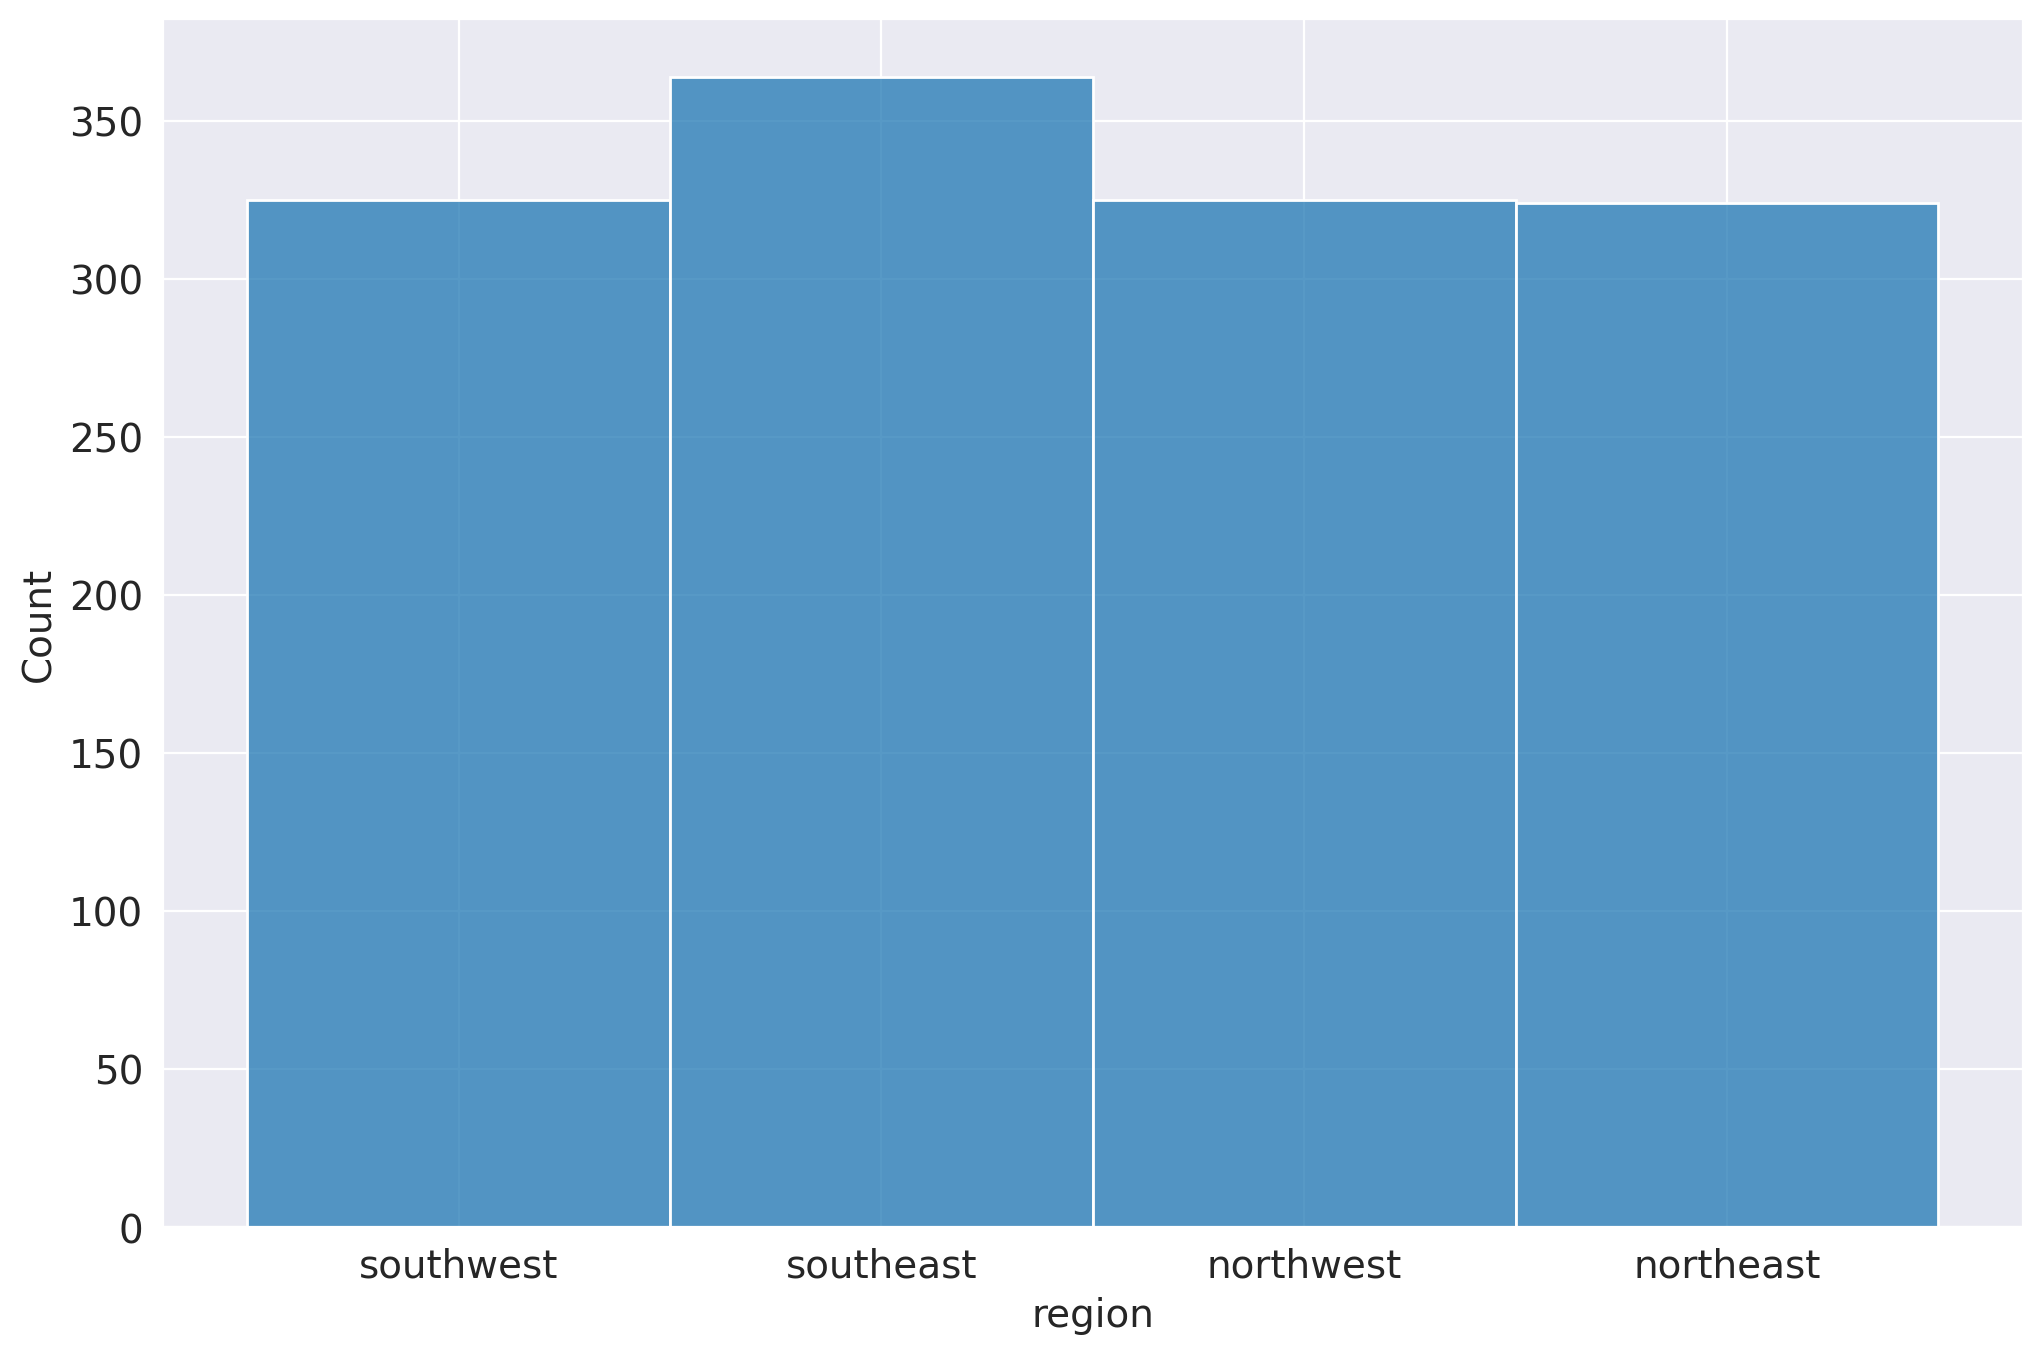

In [25]:
sns.histplot(data=df,x='region')

<AxesSubplot:xlabel='children', ylabel='Count'>

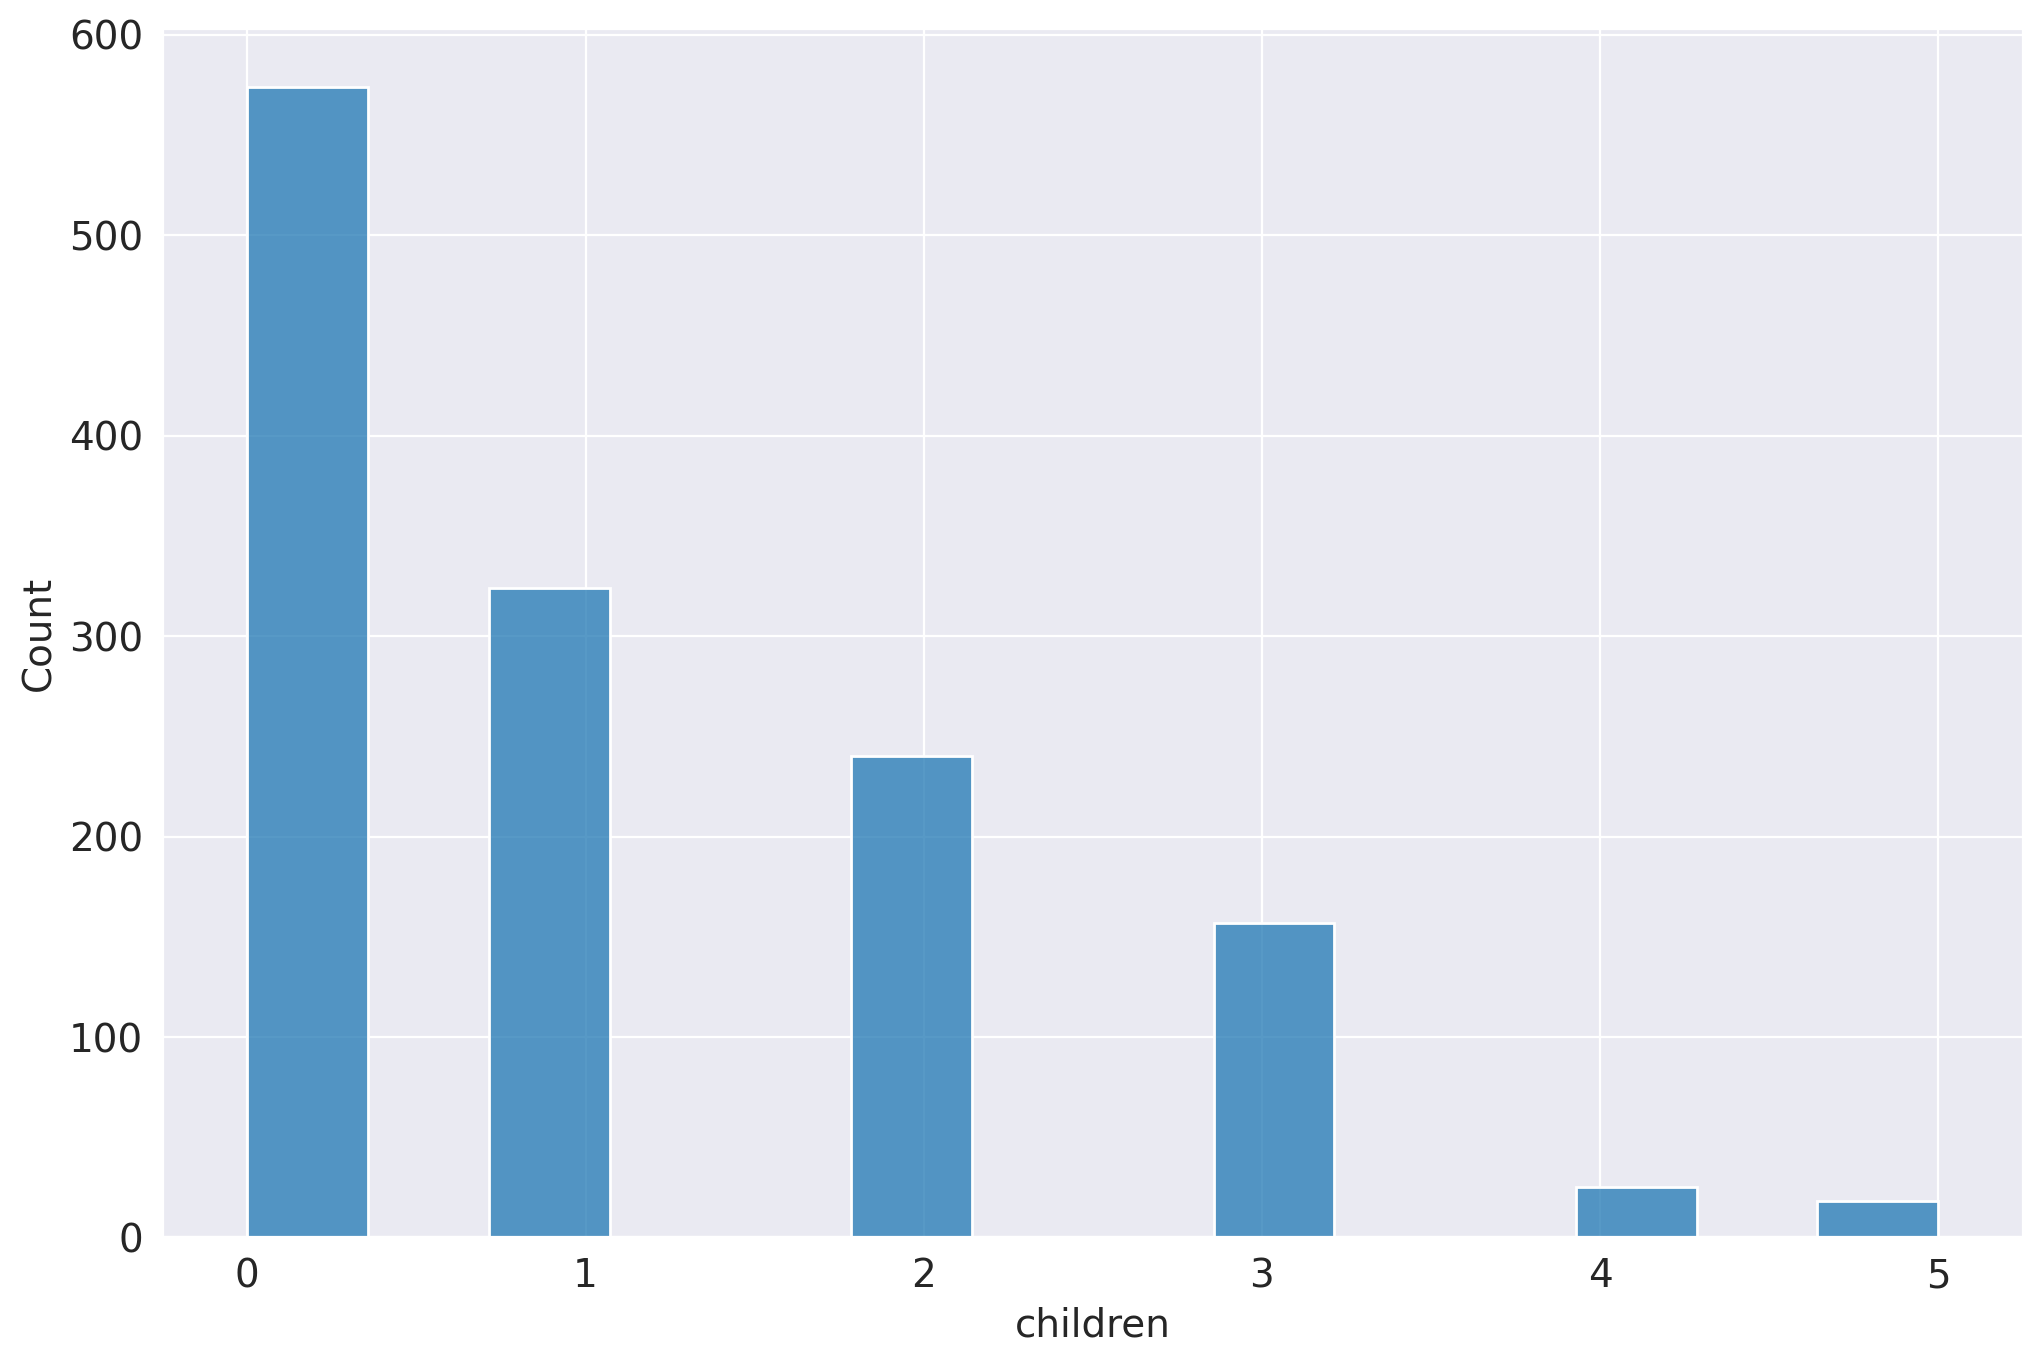

In [26]:
sns.histplot(data=df,x='children')

<AxesSubplot:xlabel='age', ylabel='charges'>

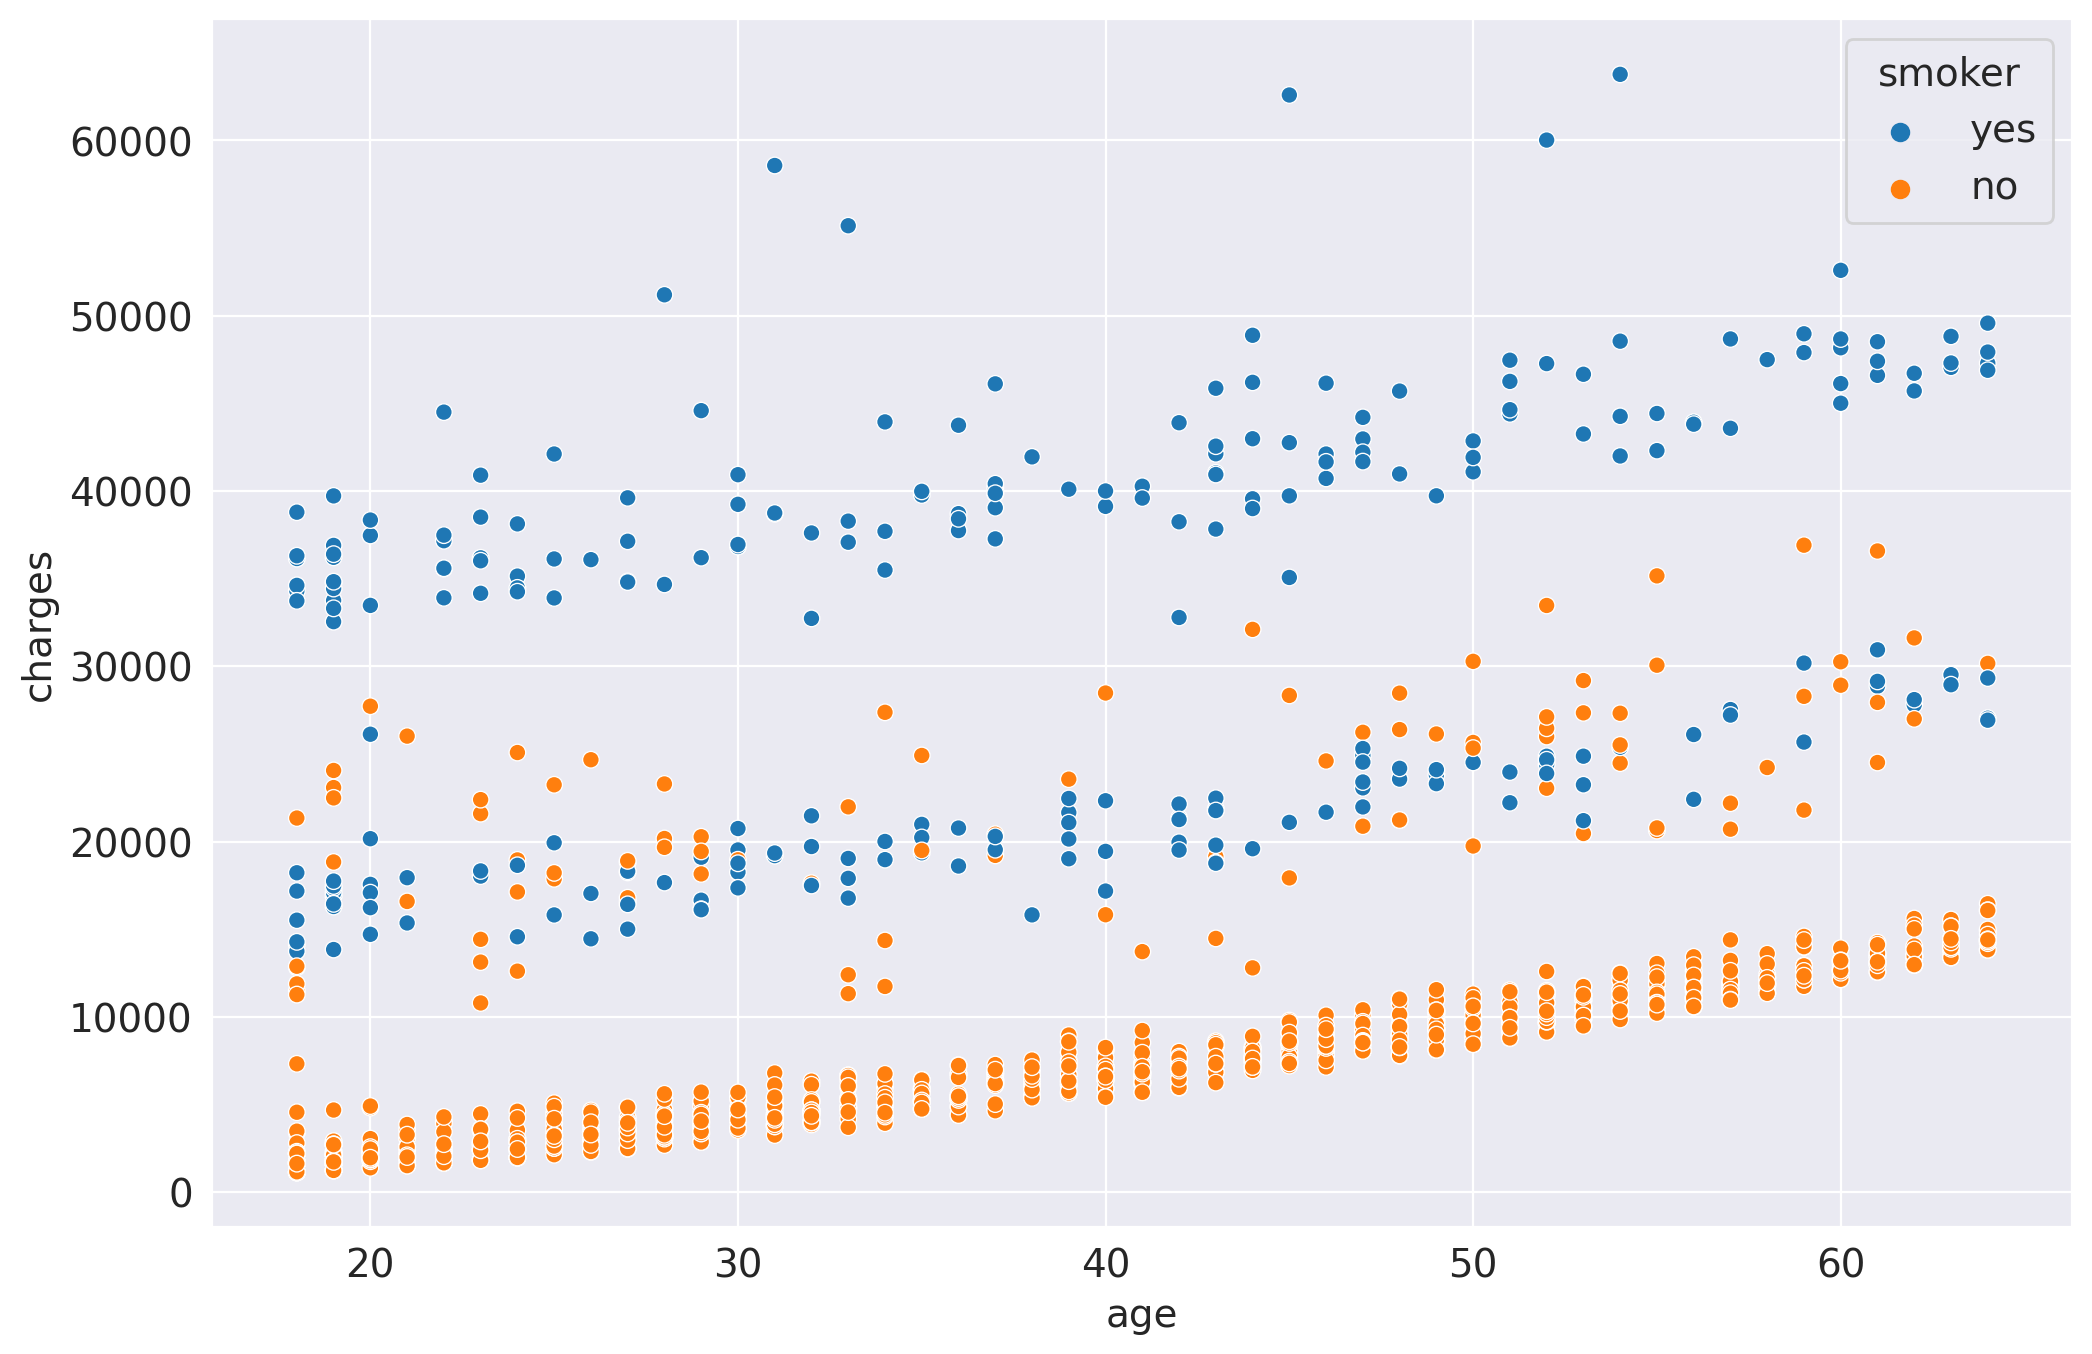

In [27]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

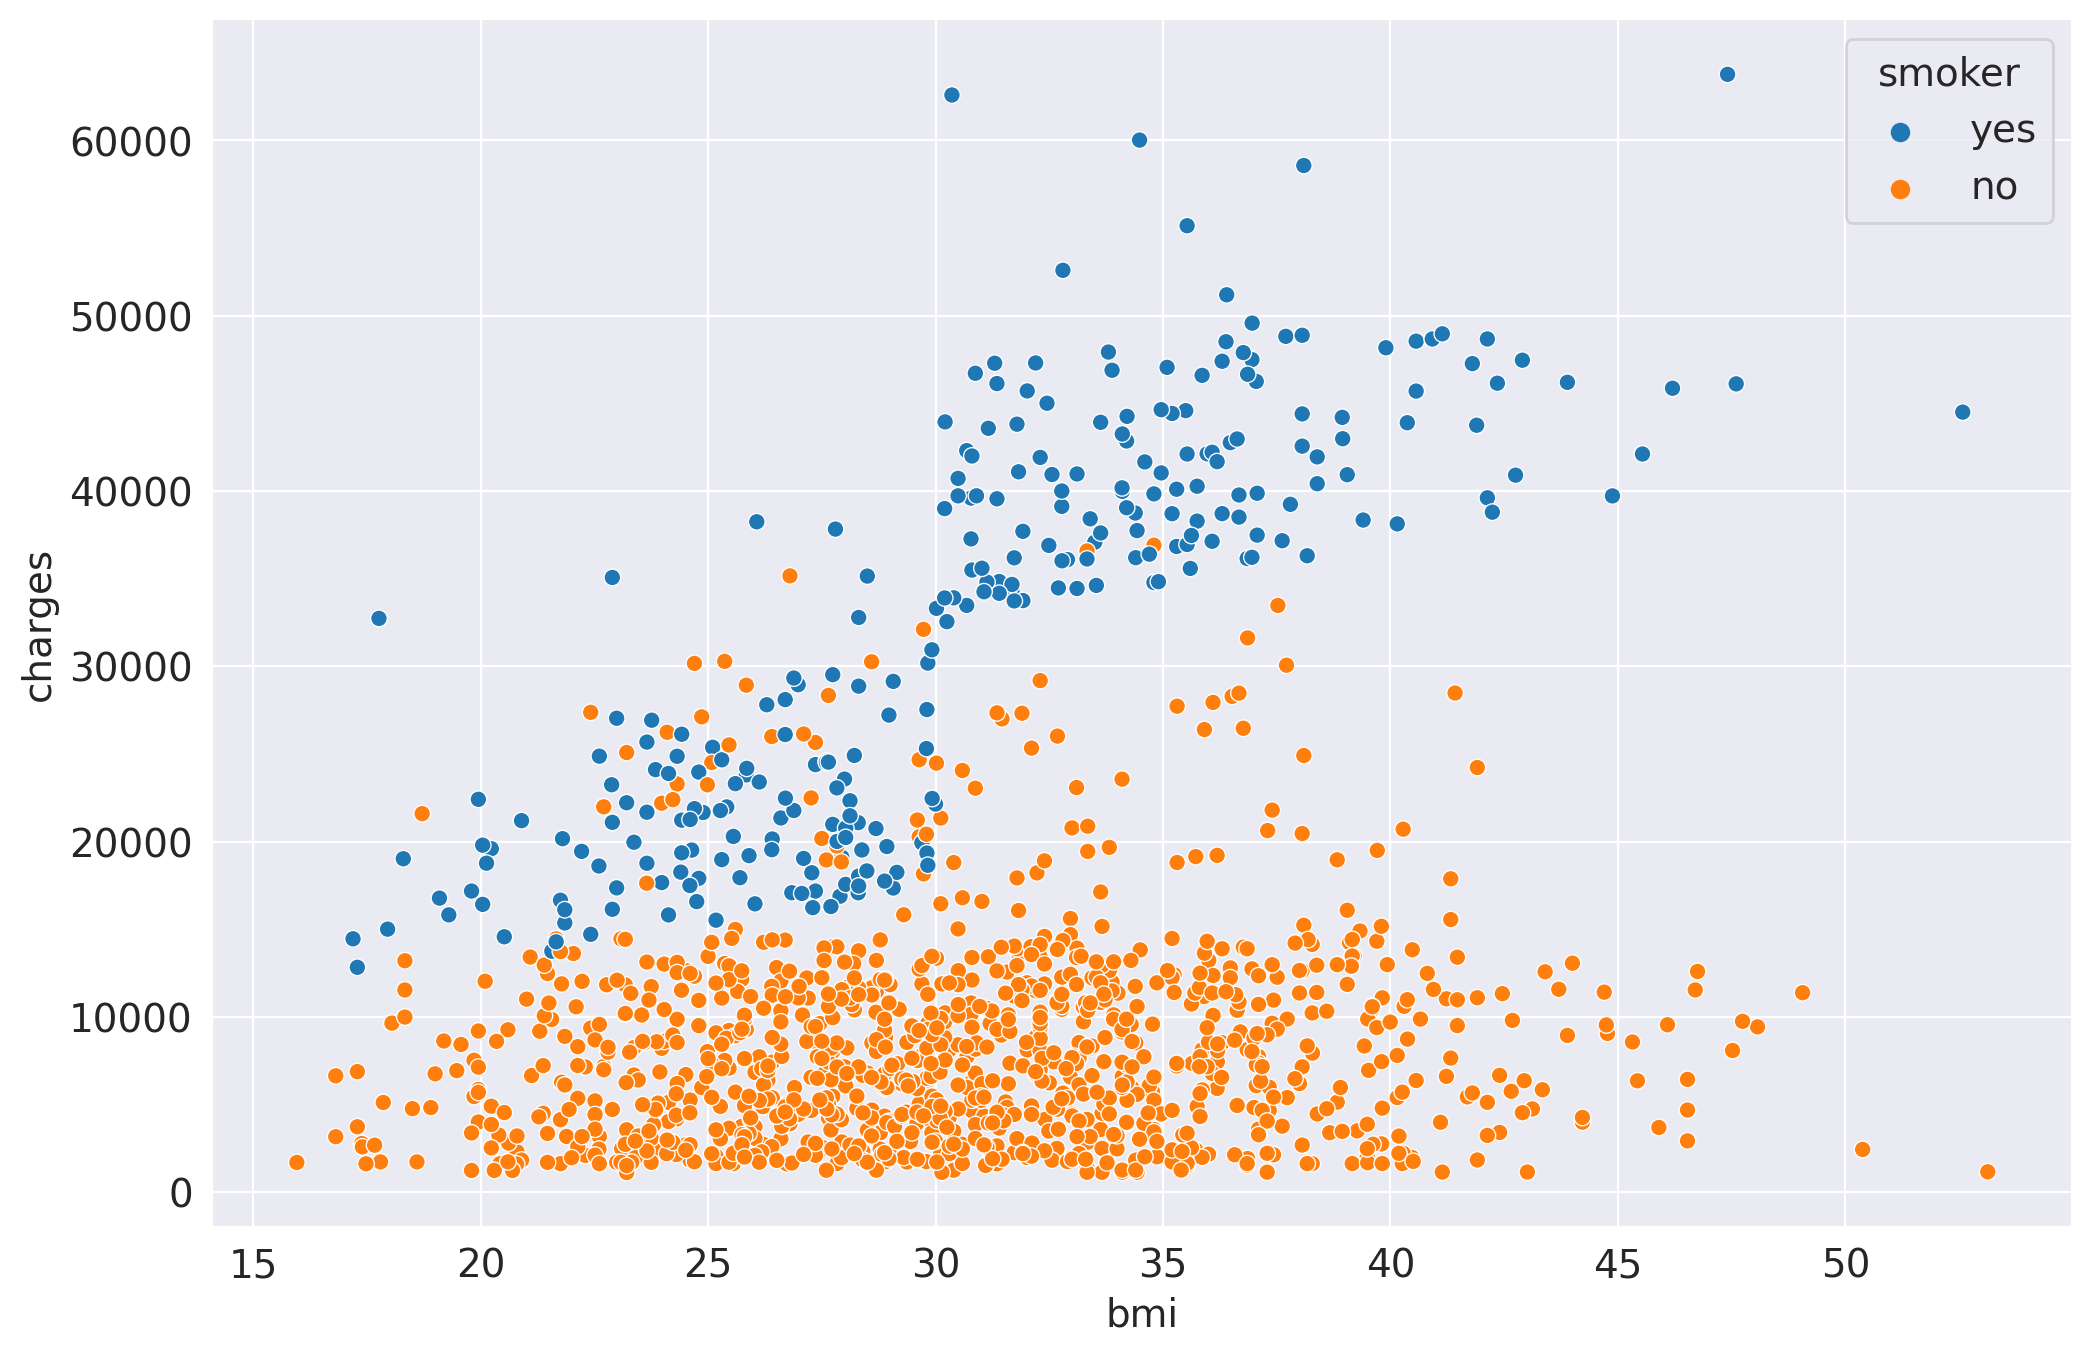

In [28]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

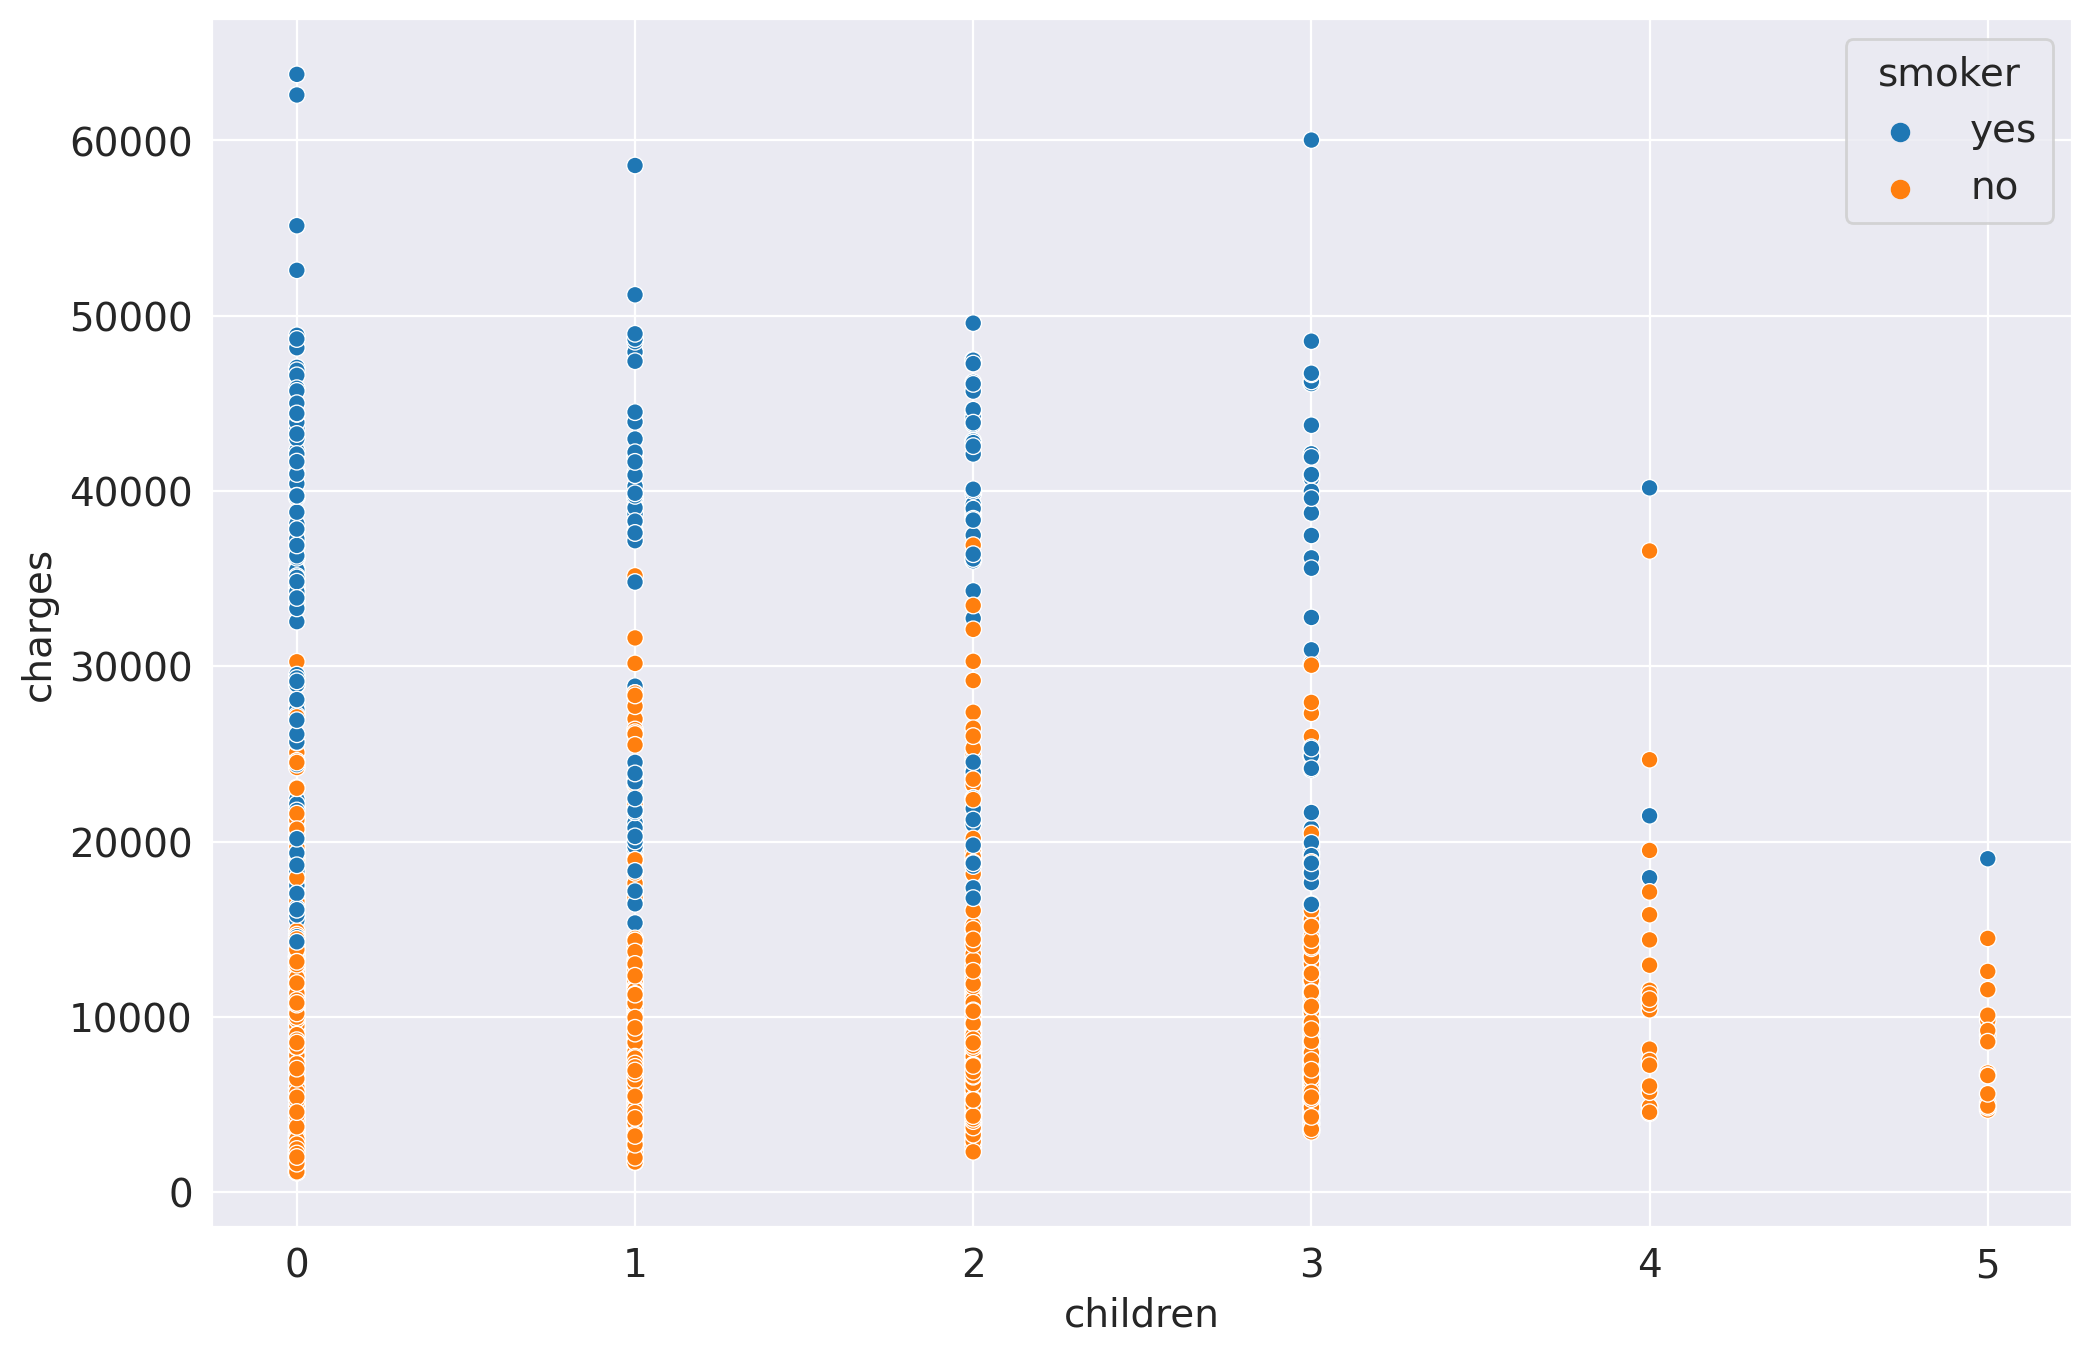

In [29]:
sns.scatterplot(data=df,x='children',y='charges',hue='smoker')   # difficult to interpret, violin plot is a good tool here

<AxesSubplot:xlabel='children', ylabel='charges'>

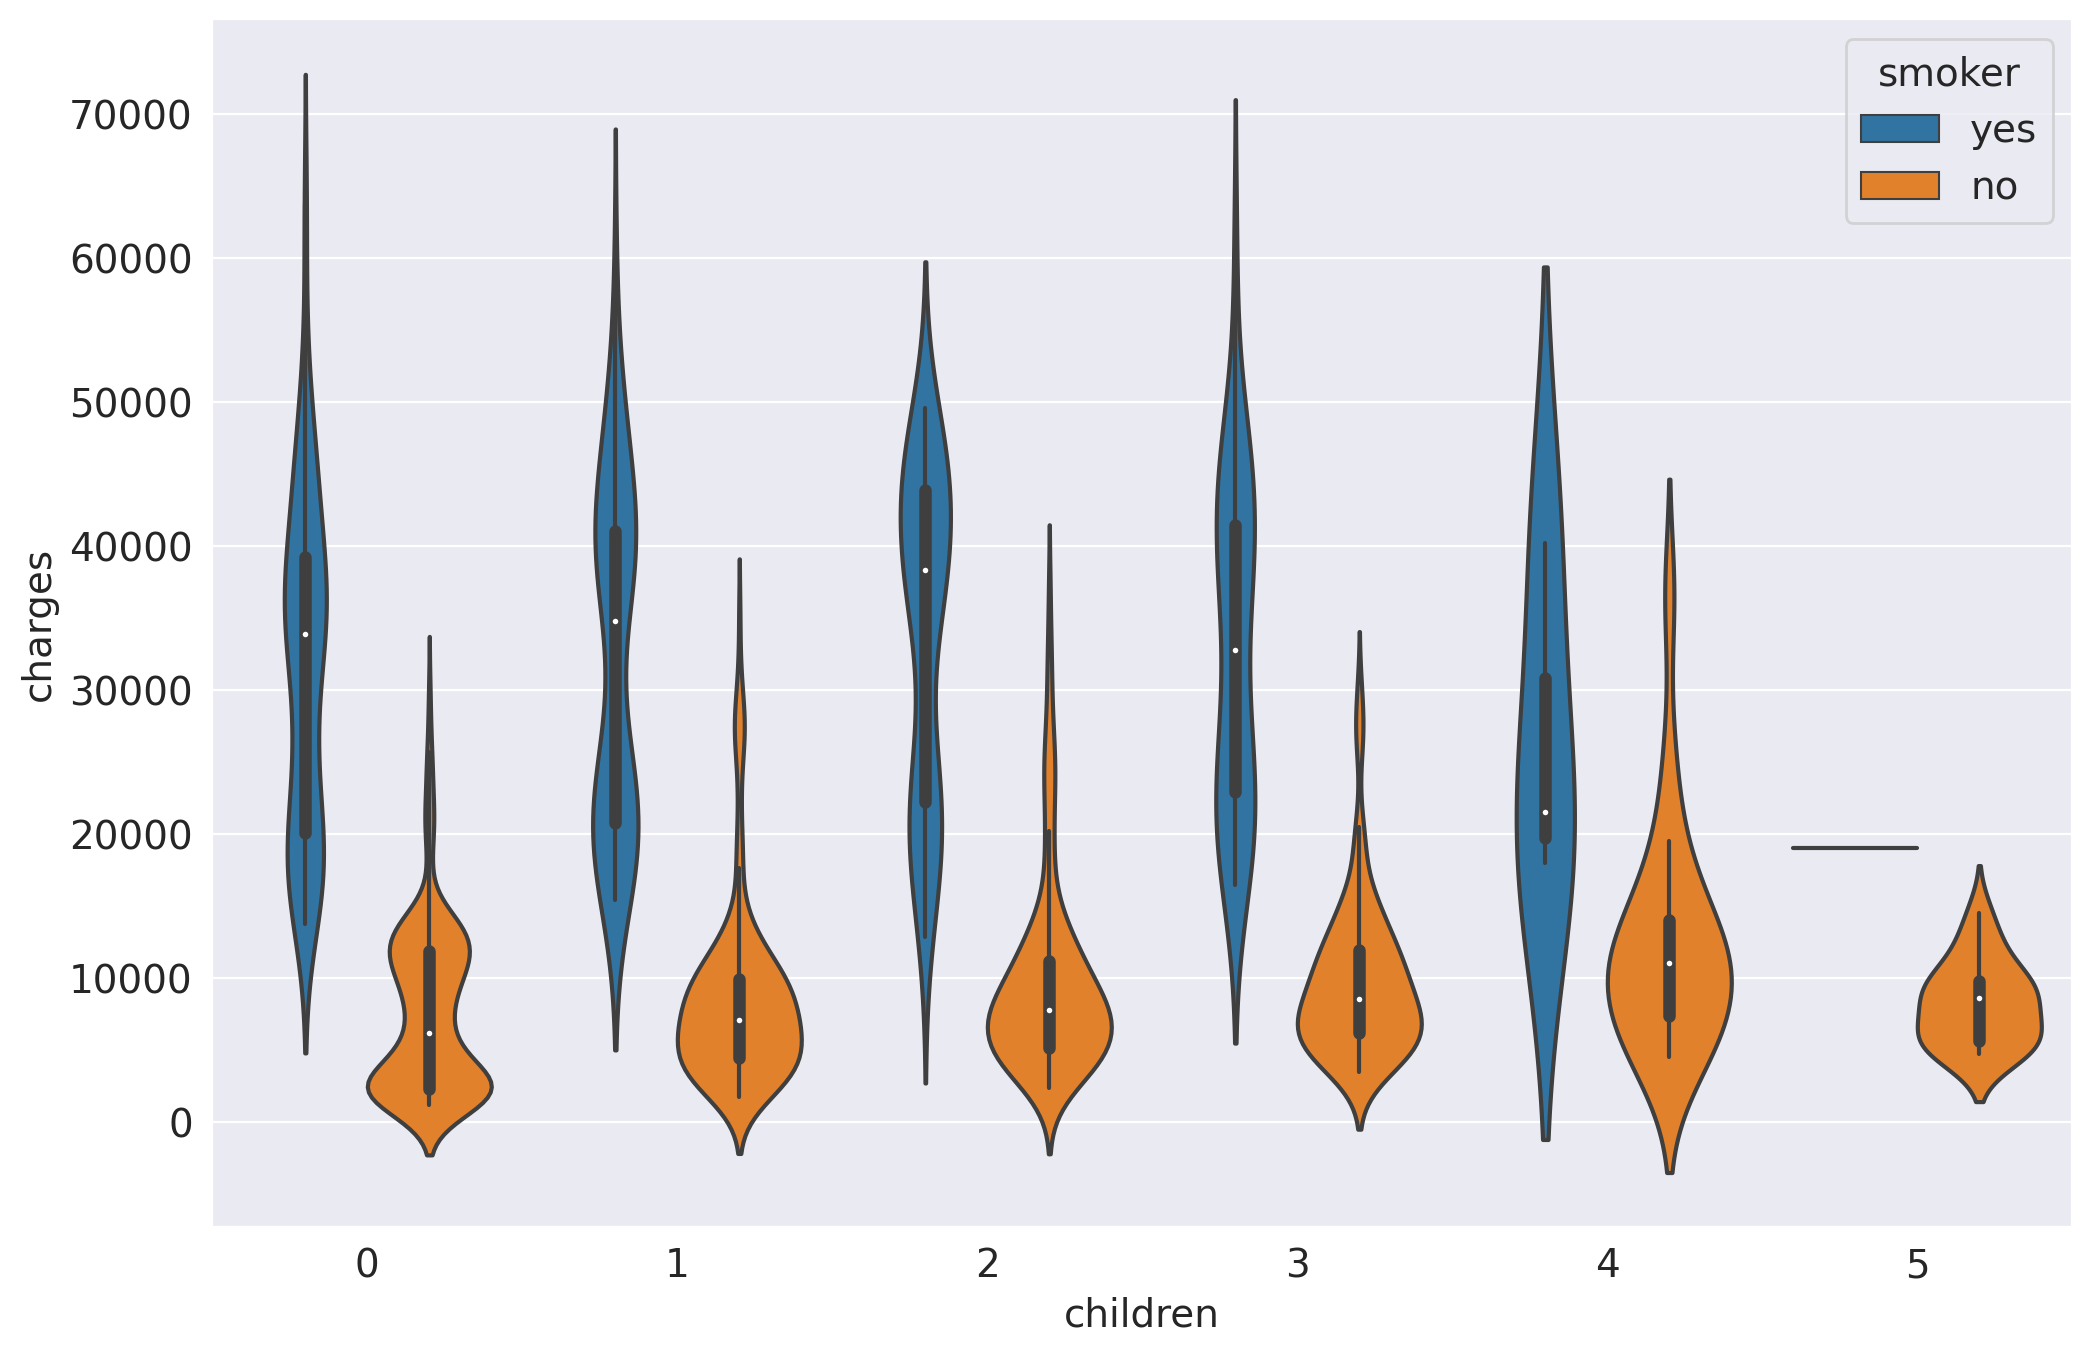

In [30]:
sns.violinplot(data=df,x='children',y='charges',hue='smoker')   # the width of the violin tells the number of points in that range

In [31]:
df['charges'].corr(df['age'])

0.29900819333064765

In [32]:
df.charges.corr(df.age)    # we can also call a column as df.column_name

0.29900819333064765

<AxesSubplot:>

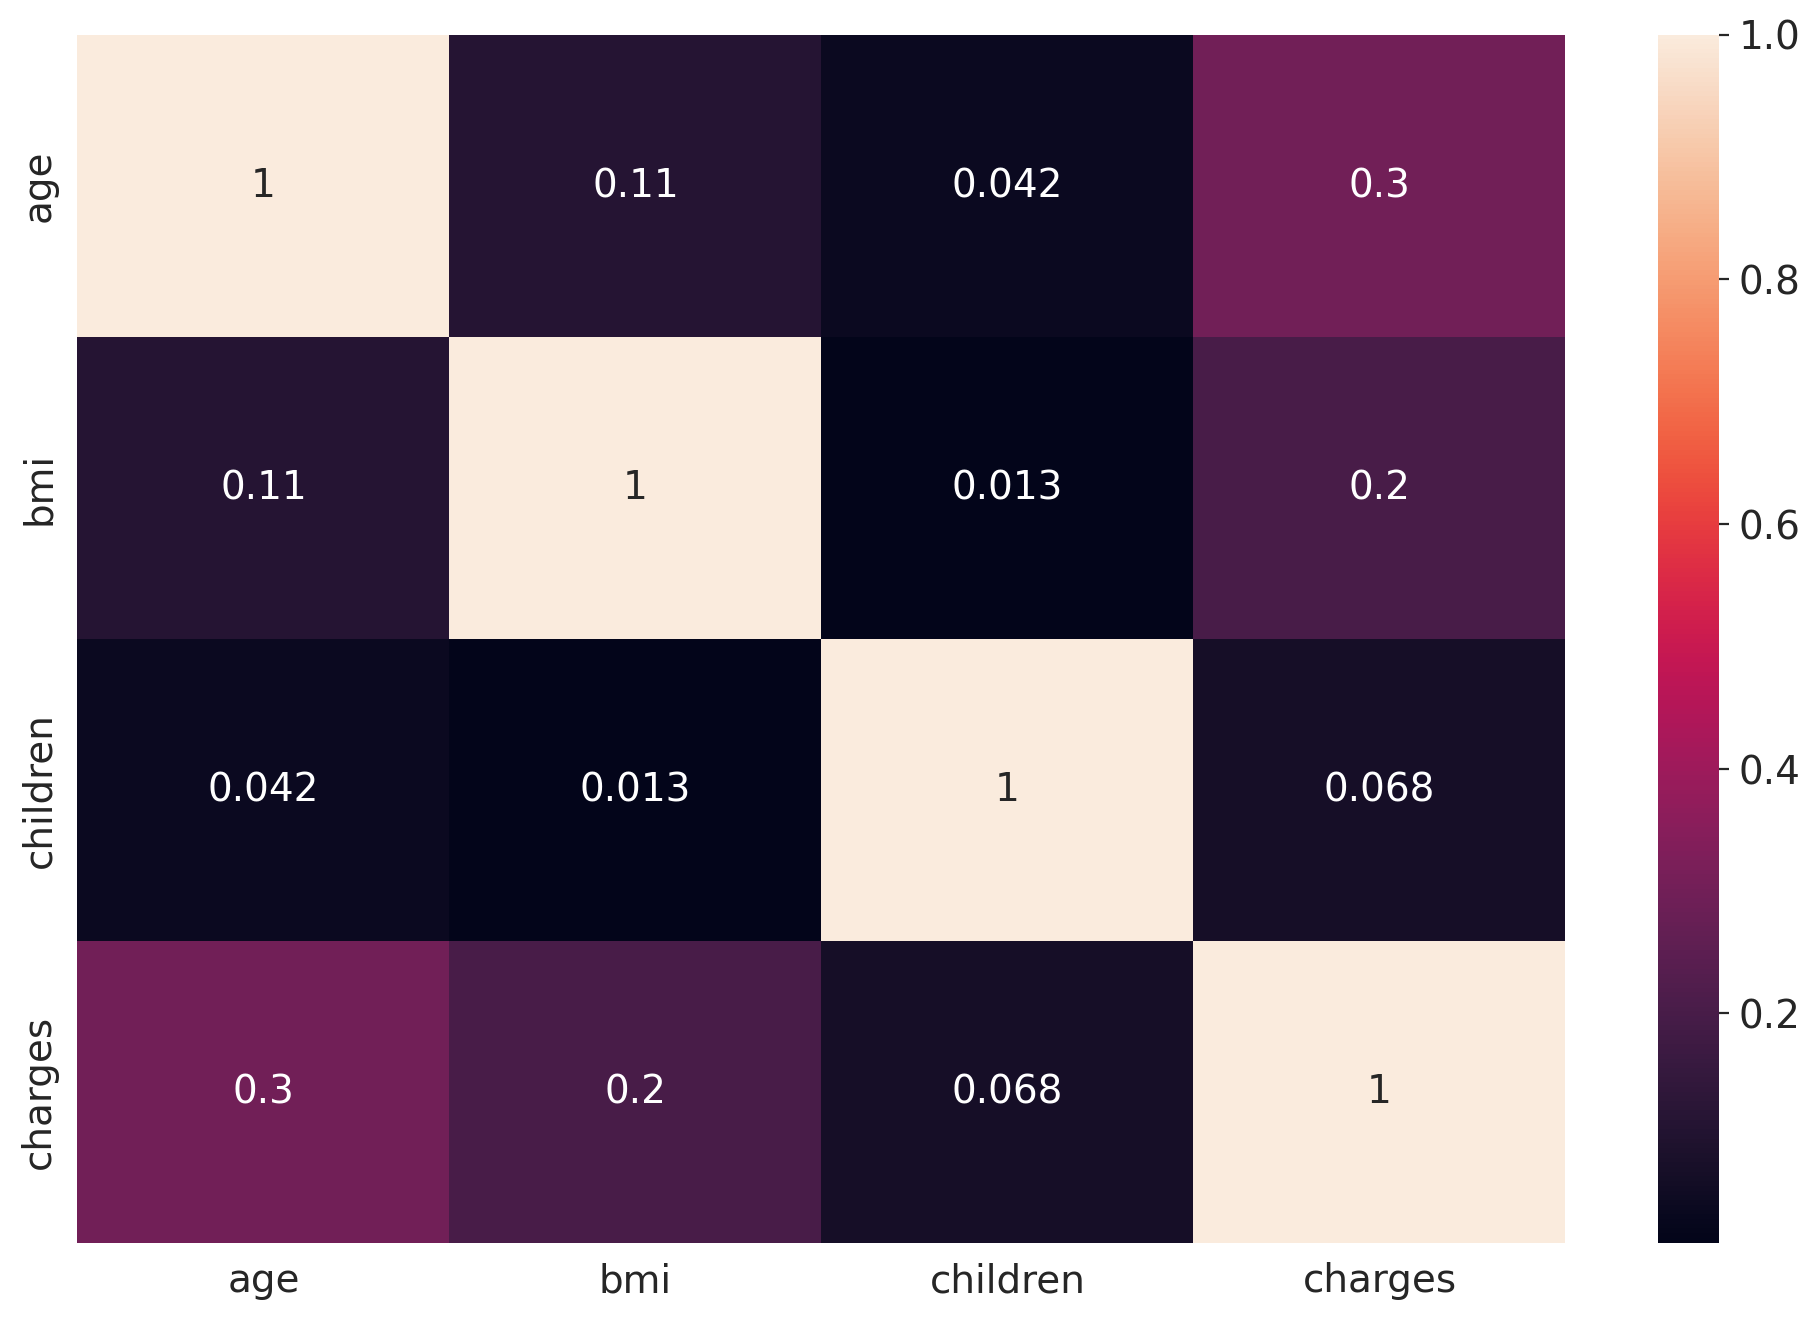

In [33]:
sns.heatmap(df.corr(),annot=True)    # smoking correlation is not calculated becoz it is categorical, so lets code it with 0 and 1 for smoker-no and yes

In [34]:
smoker_numeric_col = df['smoker'].replace(['no','yes'],[0,1])

In [35]:
smoker_numeric_col

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [36]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [37]:
# lets calculate corr b/w smoker and charges

df['charges'].corr(smoker_numeric_col)      # good correlation b/w 'charges' and 'smoker'

0.7872514304984772

**Linear Regression (predicting 'charges' using 'age' with only non-smokers)**

In [38]:
# separate input x with age and non-smokers

df_nonsmokers = df[df['smoker']=='no']

<AxesSubplot:xlabel='age', ylabel='charges'>

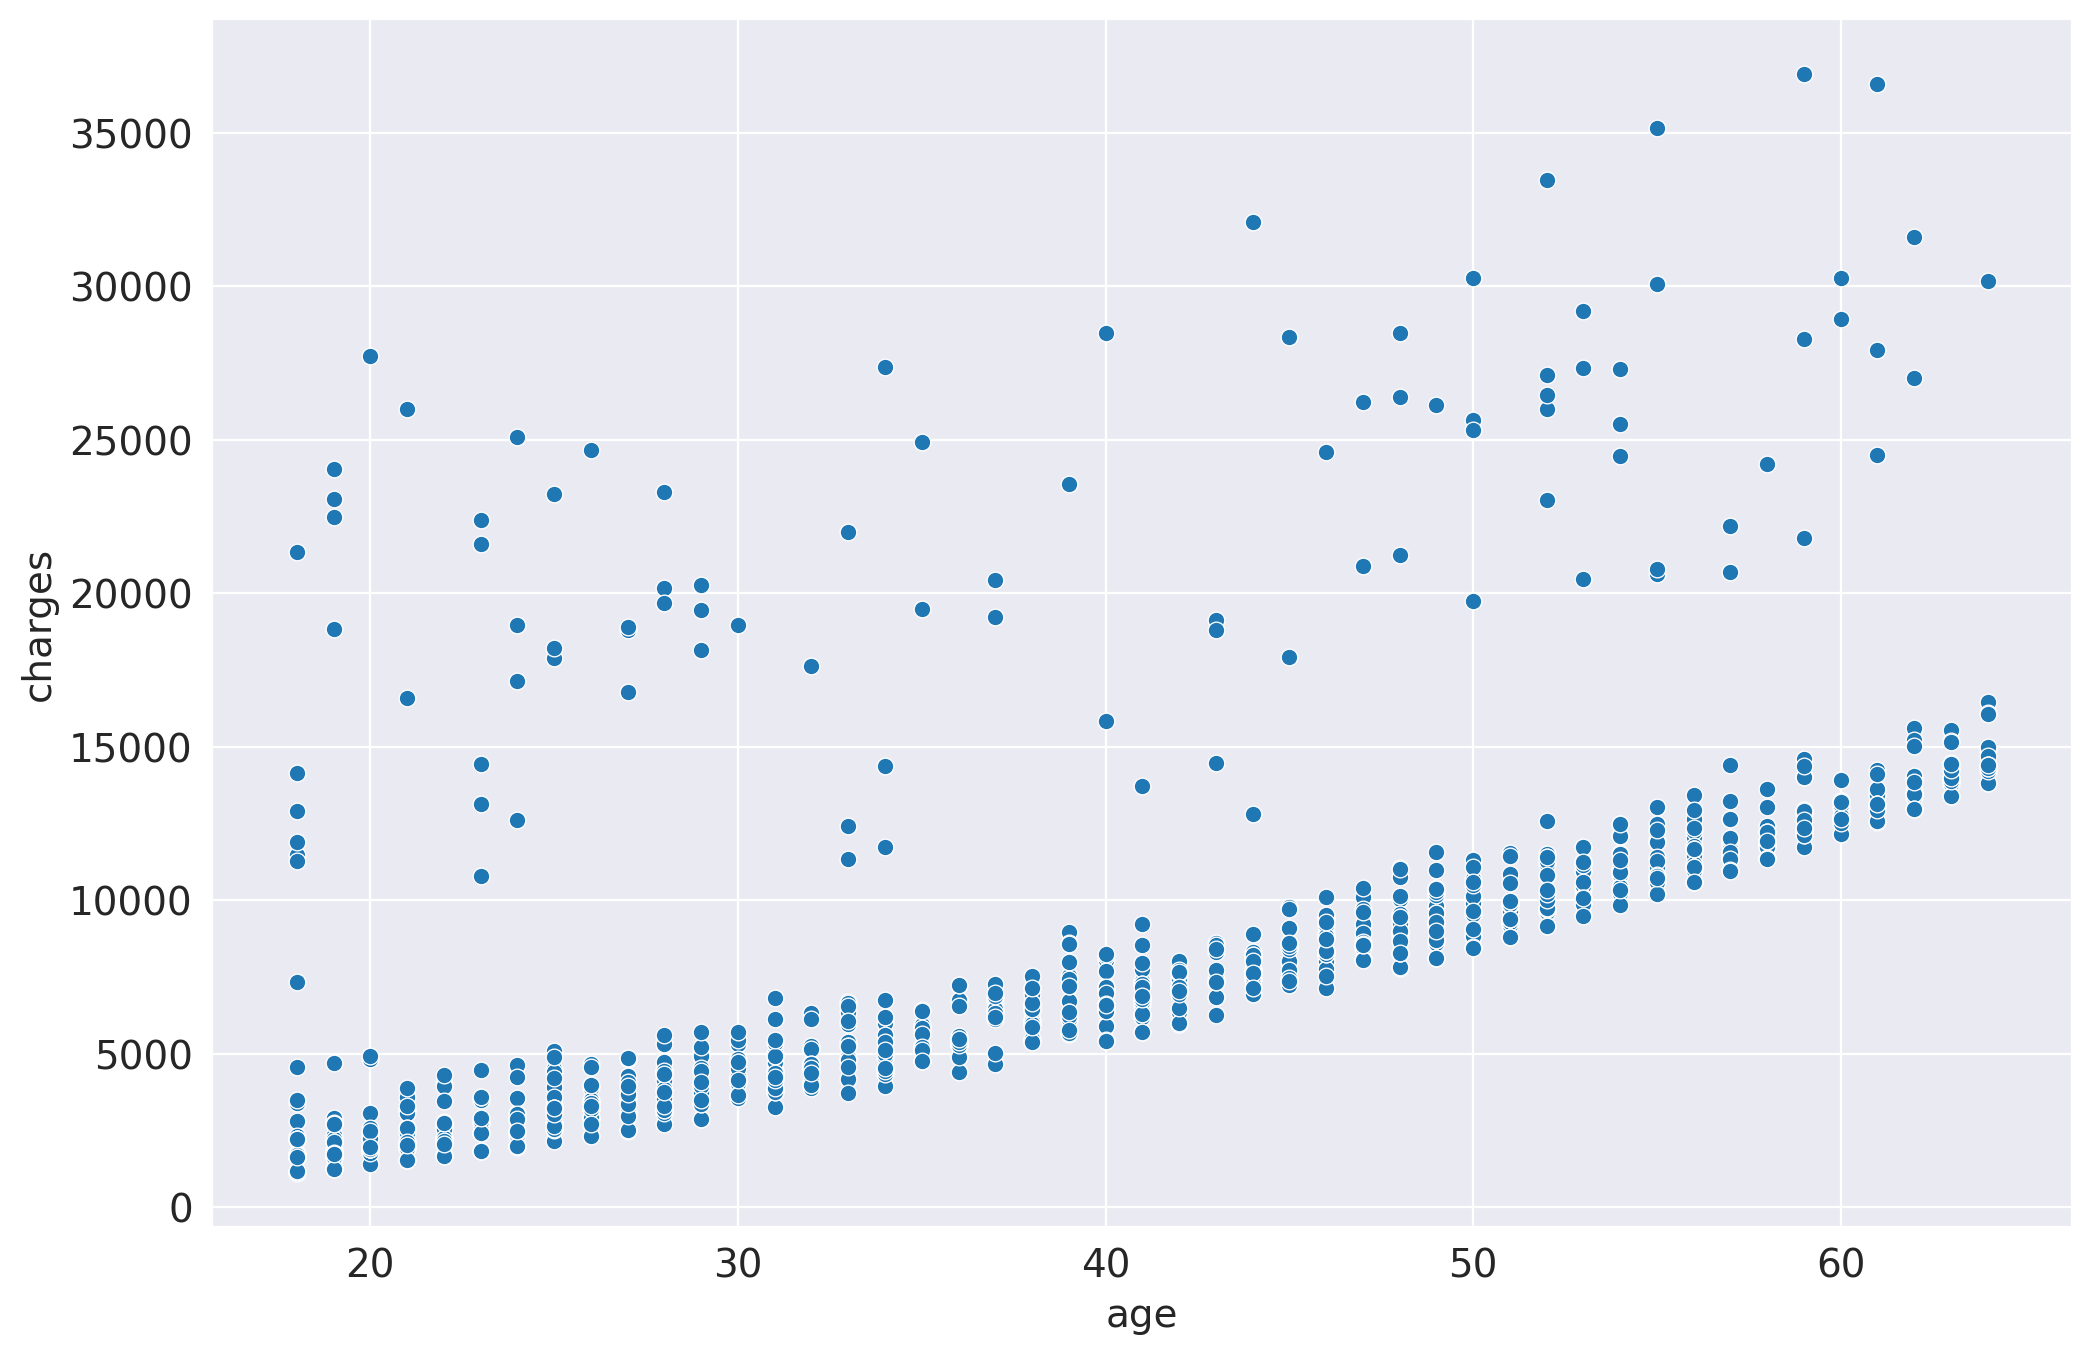

In [39]:
sns.scatterplot(data=df_nonsmokers,x='age',y='charges')

In [40]:
# y= w x + b

# where, y is cahrges and x is age

# charges = w * age + b

In [41]:
def find_charges(w,age,b):
    charges = w * age + b
    return charges

In [42]:
# lets guess w and b
w = 500
b = 500

In [43]:
ages_data = df_nonsmokers['age']

charges_pred_basic_guess = find_charges(w,ages_data,b)   # predicted charges using our basic linear regression prediction function

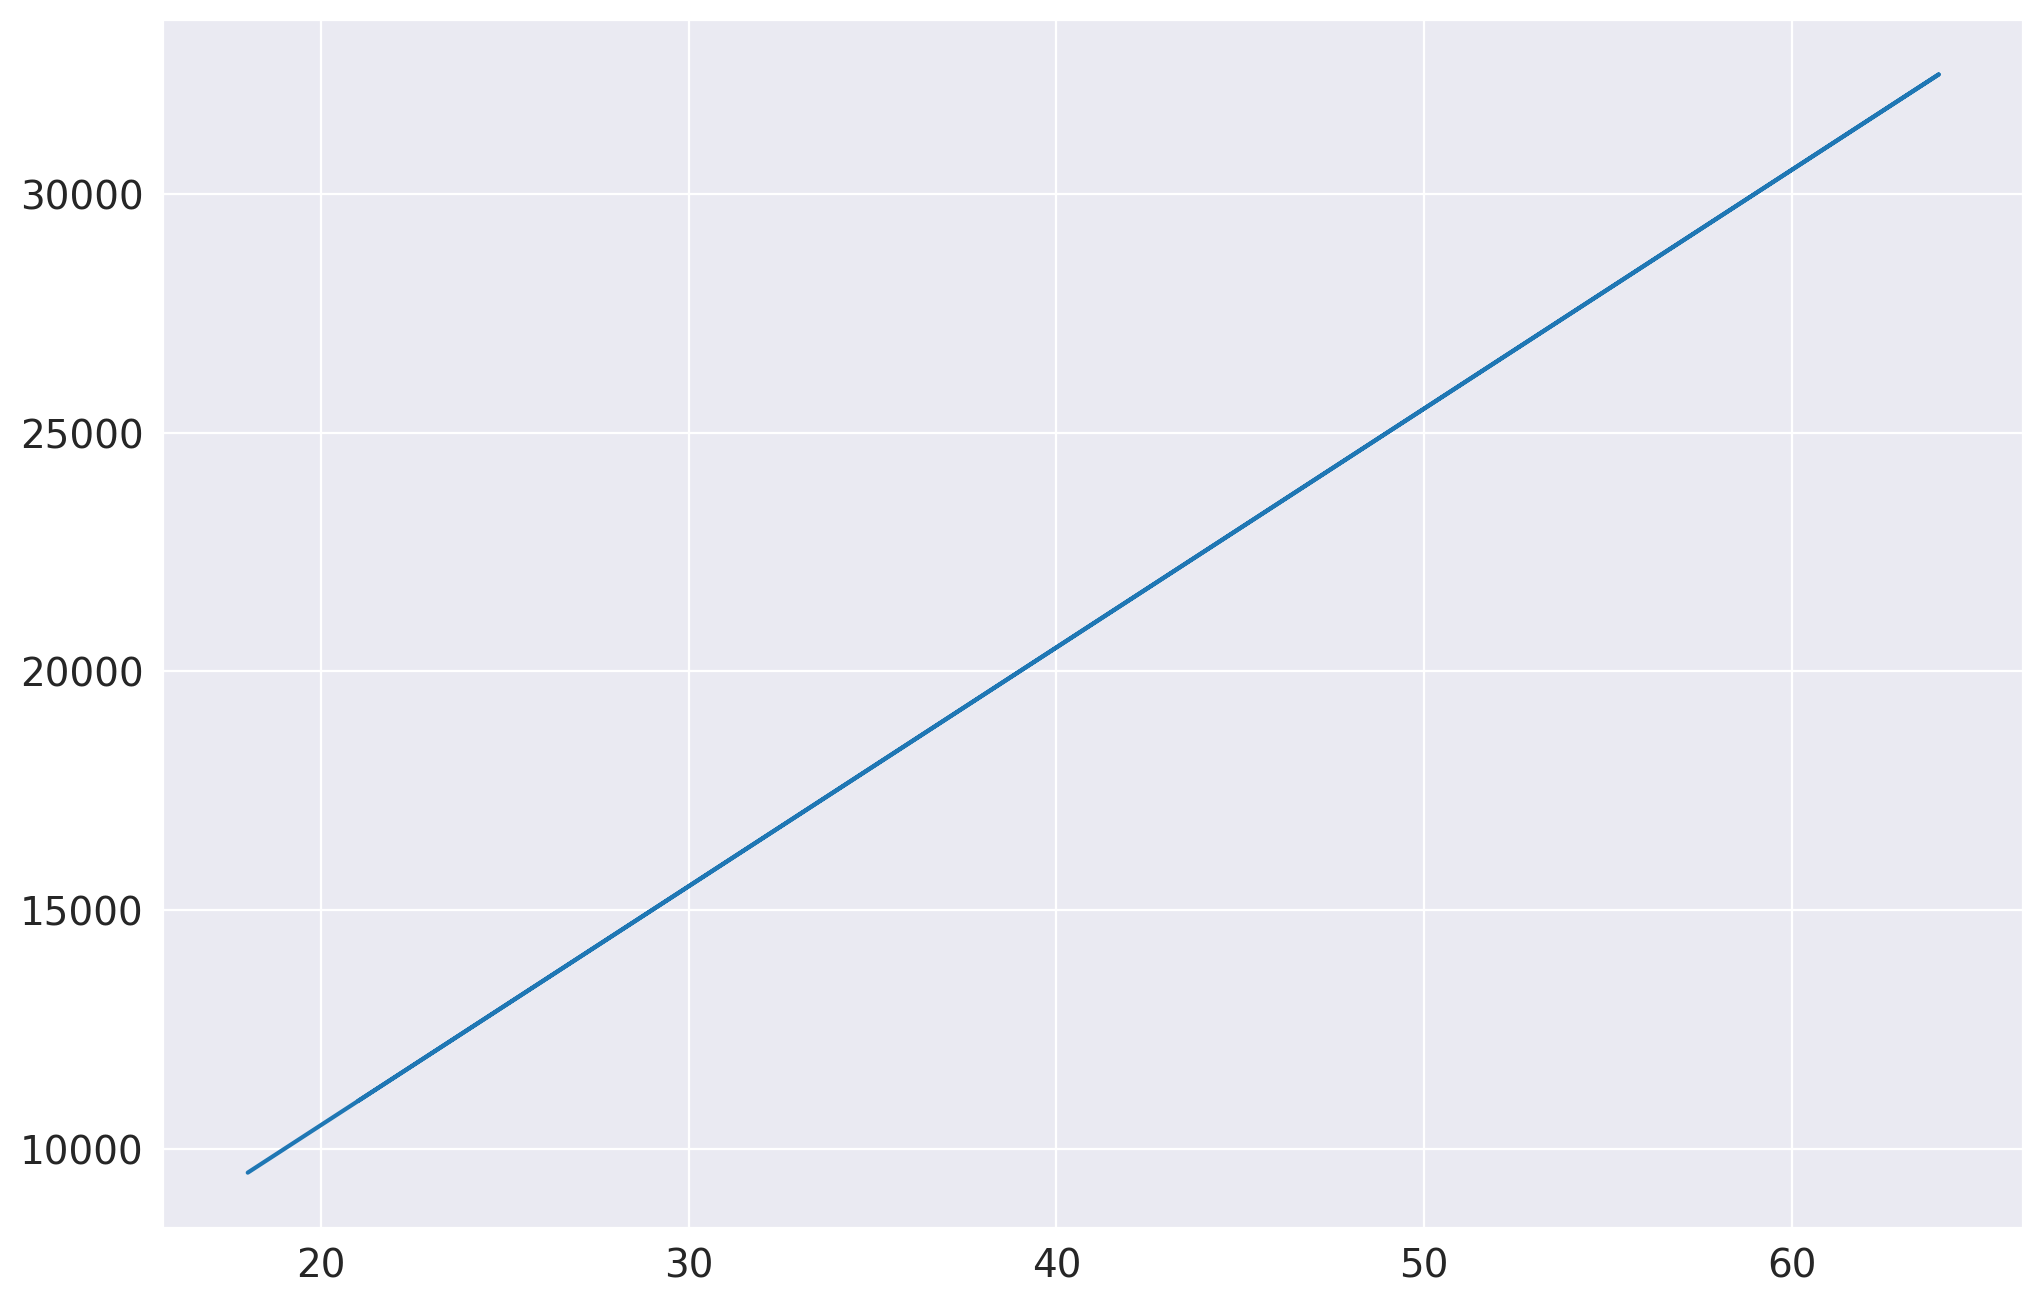

In [44]:
plt.plot(ages_data,charges_pred_basic_guess)

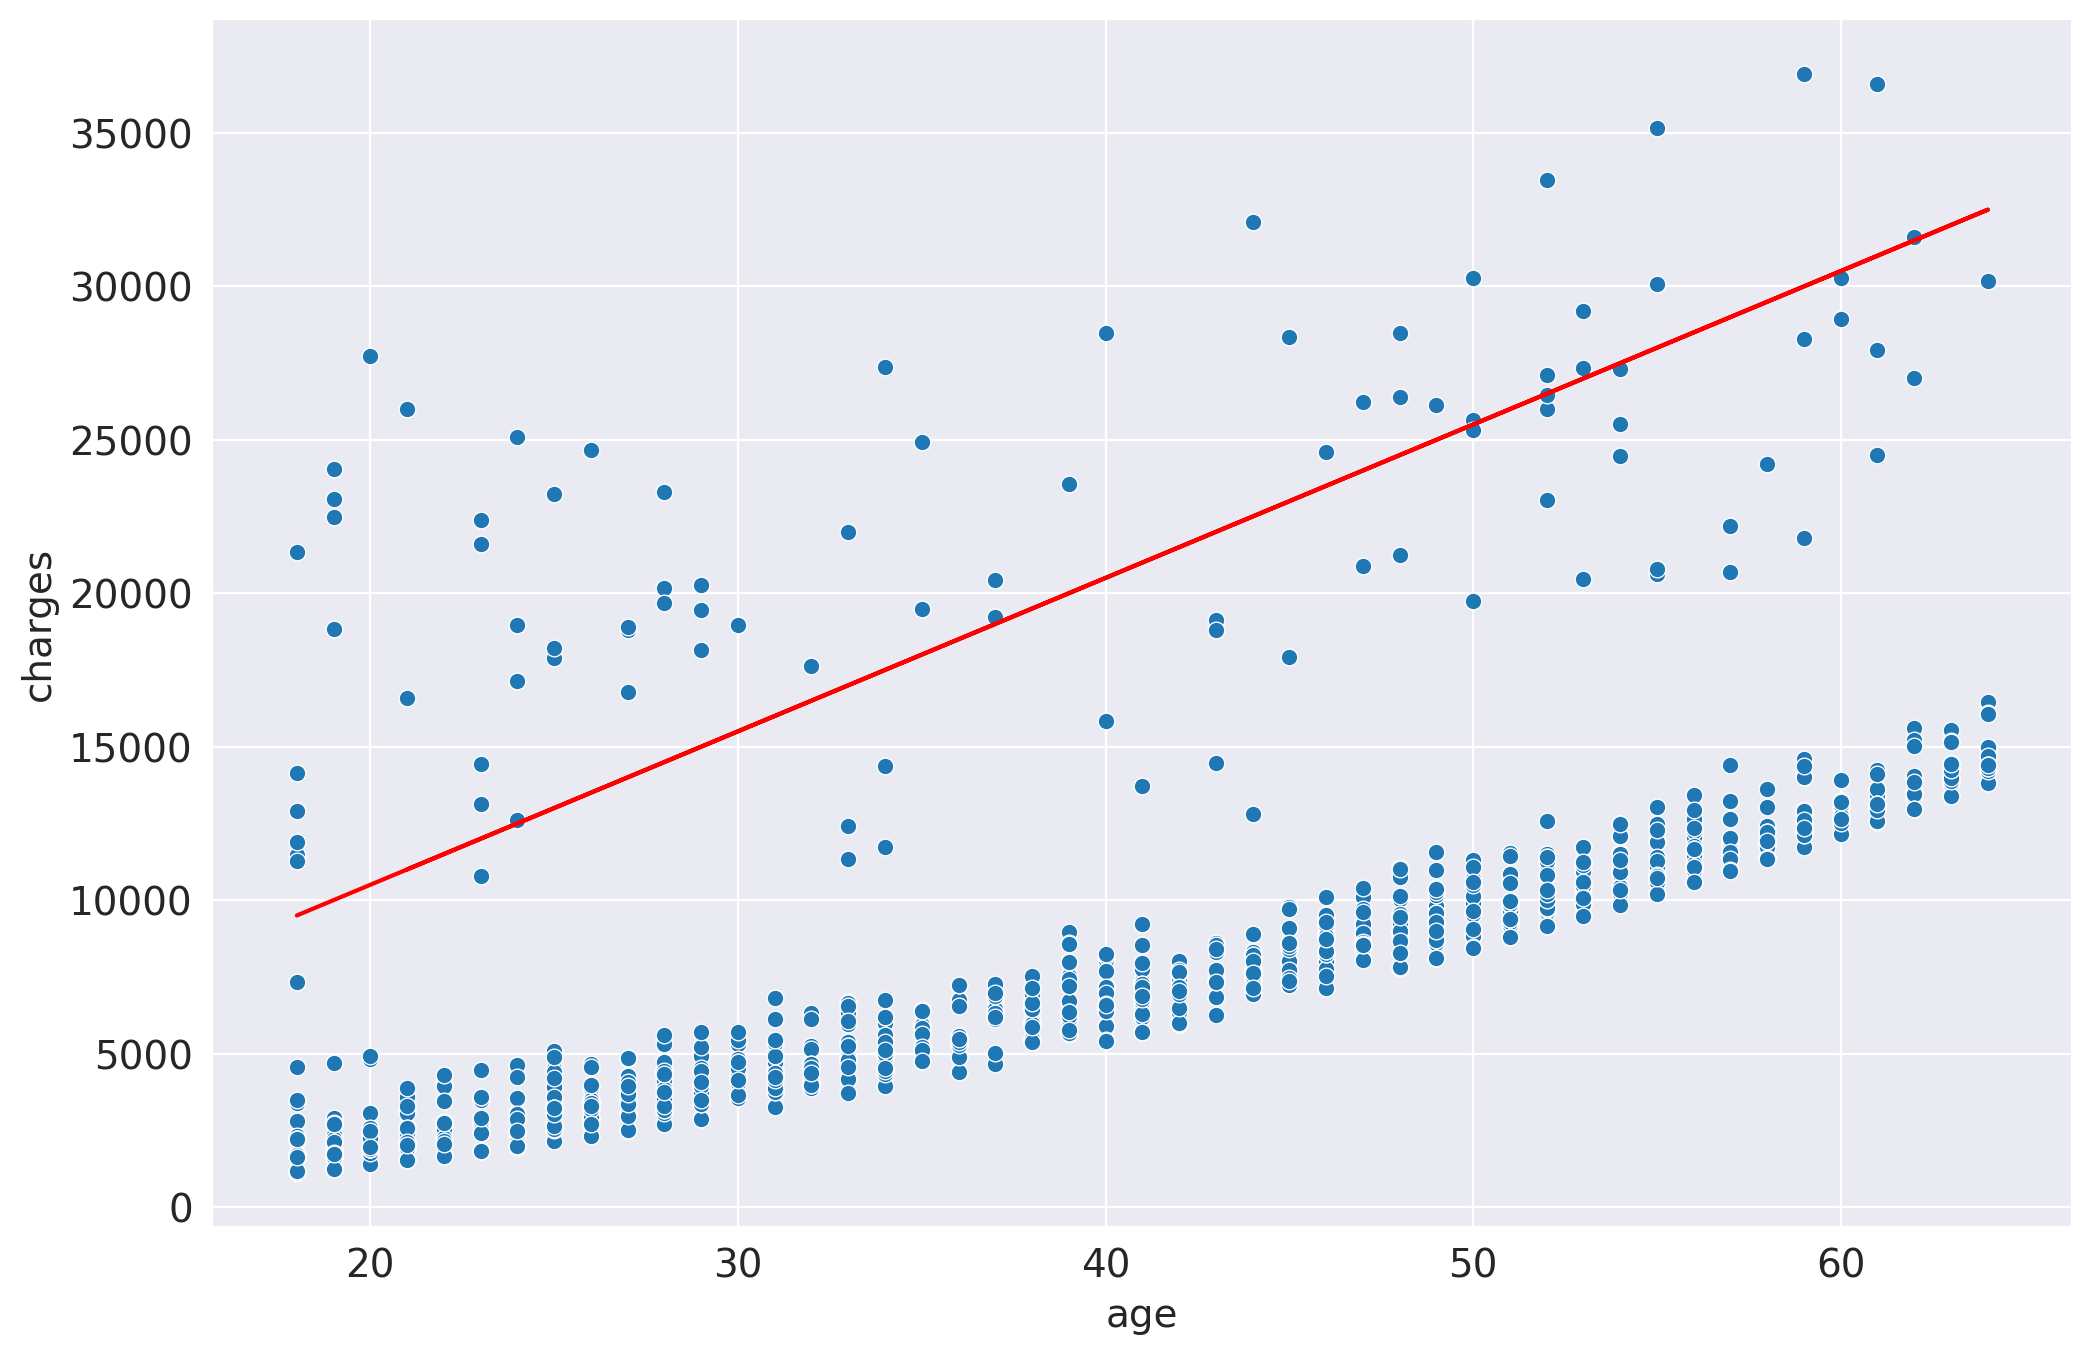

In [45]:
# lets plot actual and predicted in a single graph
sns.scatterplot(data=df_nonsmokers, x='age',y='charges')
plt.plot(ages_data,charges_pred_basic_guess,'r')

In [46]:
def trial(w,b):
    charges_pred_basic_guess = w * ages_data + b
    sns.scatterplot(data=df_nonsmokers, x='age',y='charges')
    plt.plot(ages_data,charges_pred_basic_guess,'r')

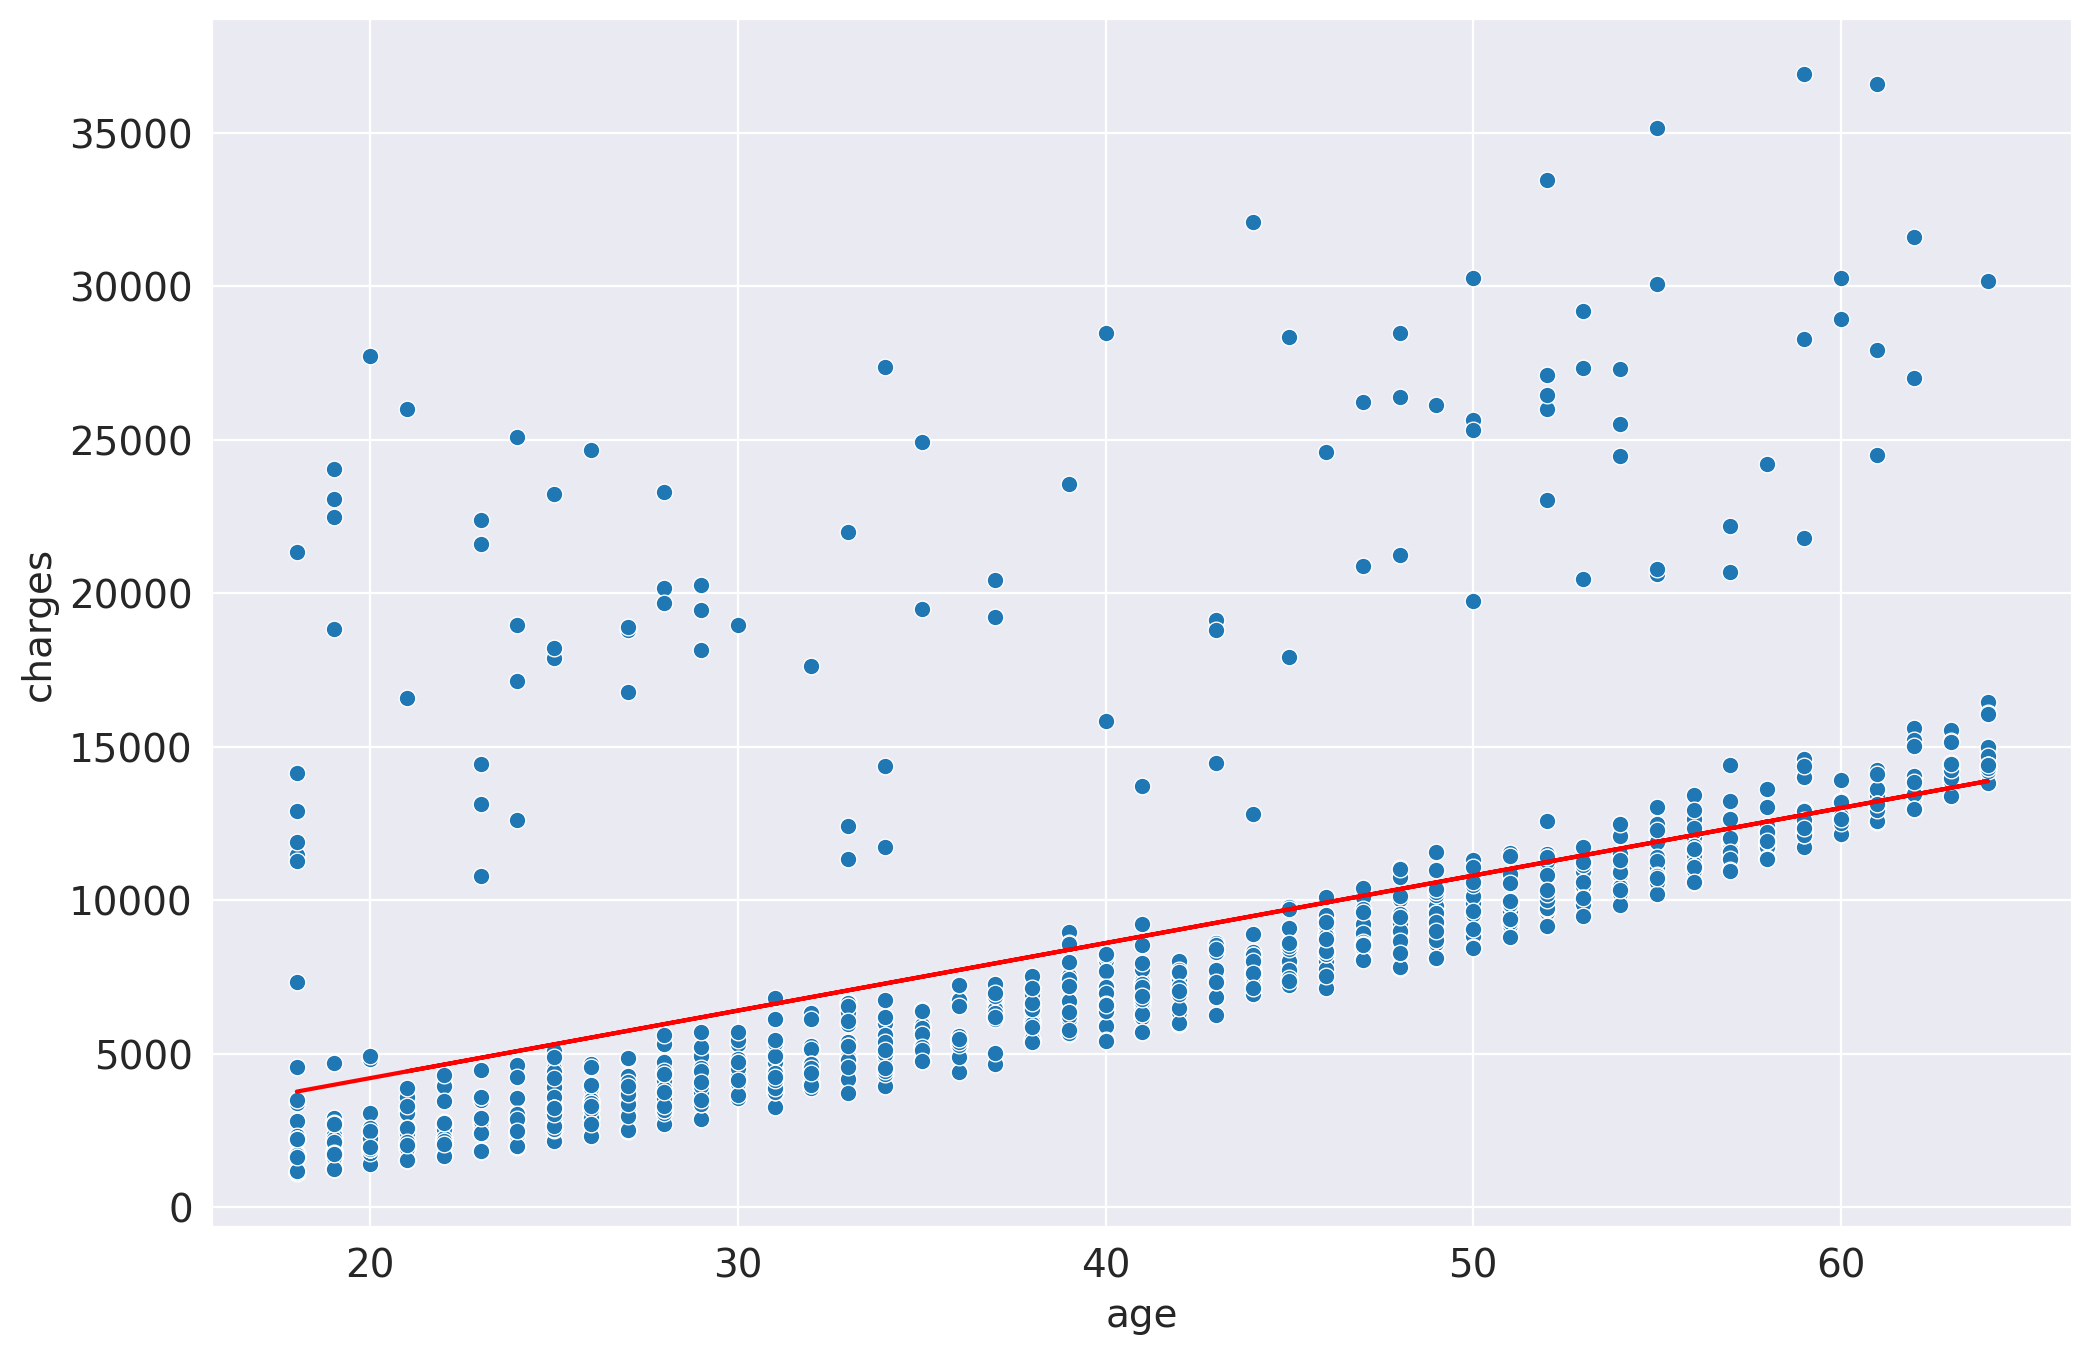

In [47]:
trial(220,-200)

In [48]:
def rmse(actual,predicted):
    return np.sqrt(np.mean(np.square(actual-predicted)))

In [49]:
predicted = find_charges(220,ages_data,-200)
rmse_val = rmse(df_nonsmokers['charges'],predicted)
rmse_val

4709.805304103744

**Using scikit-learn when 'age' is the only input feature**

In [50]:
X = df_nonsmokers[['age']]

y = df_nonsmokers['charges']

In [51]:
X.shape

(1064, 1)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [54]:
model.fit(X,y)

LinearRegression()

In [55]:
model.predict([[23],[37]])

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4055.30443855, 7796.78921819])

# Scikit Learn models implementation

**Linear Regression**

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
# separating features and Target 
X = df.drop('charges',axis=1)
y = df['charges']

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


**Observations on dataset:**

There are three categorical features in input dataset- sex, smoker, region

Three numerical columns- age, bmi, children

In [59]:
# lets separate them into different variables, so that one-hot encoding can be performed

X_numerical = X.select_dtypes(include=np.number)
X_categorical = X.select_dtypes(exclude=np.number)

In [60]:
X_numerical.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [61]:
X_categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


whether scaling is required for this dataset? majority of the models that are being fitted are tree-based methods, which are not dependent on scaling of the data. Hence, scaling is not performed on the dataset

In [63]:
X_numerical.isnull().sum()
# there are no null values in the dataset

age         0
bmi         0
children    0
dtype: int64

In [64]:
X_categorical.isnull().sum()

sex       0
smoker    0
region    0
dtype: int64

In [65]:
# let us find one-hot encoding of categorical columns

In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='if_binary',handle_unknown='ignore')

encoder.fit(X_categorical)

X_categorical_transformed = encoder.transform(X_categorical)

In [67]:
encoded_feature_names = encoder.get_feature_names_out(X_categorical.columns)
encoded_feature_names

array(['sex_male', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'], dtype=object)

In [68]:
type(X_categorical_transformed)

# convert this into a dataframe, so that it can be merged with Numerical dataframe

numpy.ndarray

In [69]:
X_categorical_final = pd.DataFrame(X_categorical_transformed, columns=encoded_feature_names)
X_categorical_final

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,1.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
# lets merge this with X_numerical

X_final = pd.concat([X_numerical, X_categorical_final],axis=1)
X_final

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,0.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
new_df = pd.concat([X_final,y],axis=1)

In [72]:
new_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,18,33.770,1,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,28,33.000,3,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33,22.705,0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32,28.880,0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520


In [73]:
new_df.corr()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.109272,0.042469,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
bmi,0.109272,1.000000,0.012759,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.198341
children,0.042469,0.012759,1.000000,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
sex_male,-0.020856,0.046371,0.017163,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
smoker_yes,-0.025019,0.003750,0.007673,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
region_northeast,0.002475,-0.138156,-0.022808,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,-0.135996,0.024806,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,0.270025,-0.023066,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982
region_southwest,0.010016,-0.006205,0.021914,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.043210
charges,0.299008,0.198341,0.067998,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210,1.000000


In [74]:
# 'smoker' is highly correlated with charges

<AxesSubplot:>

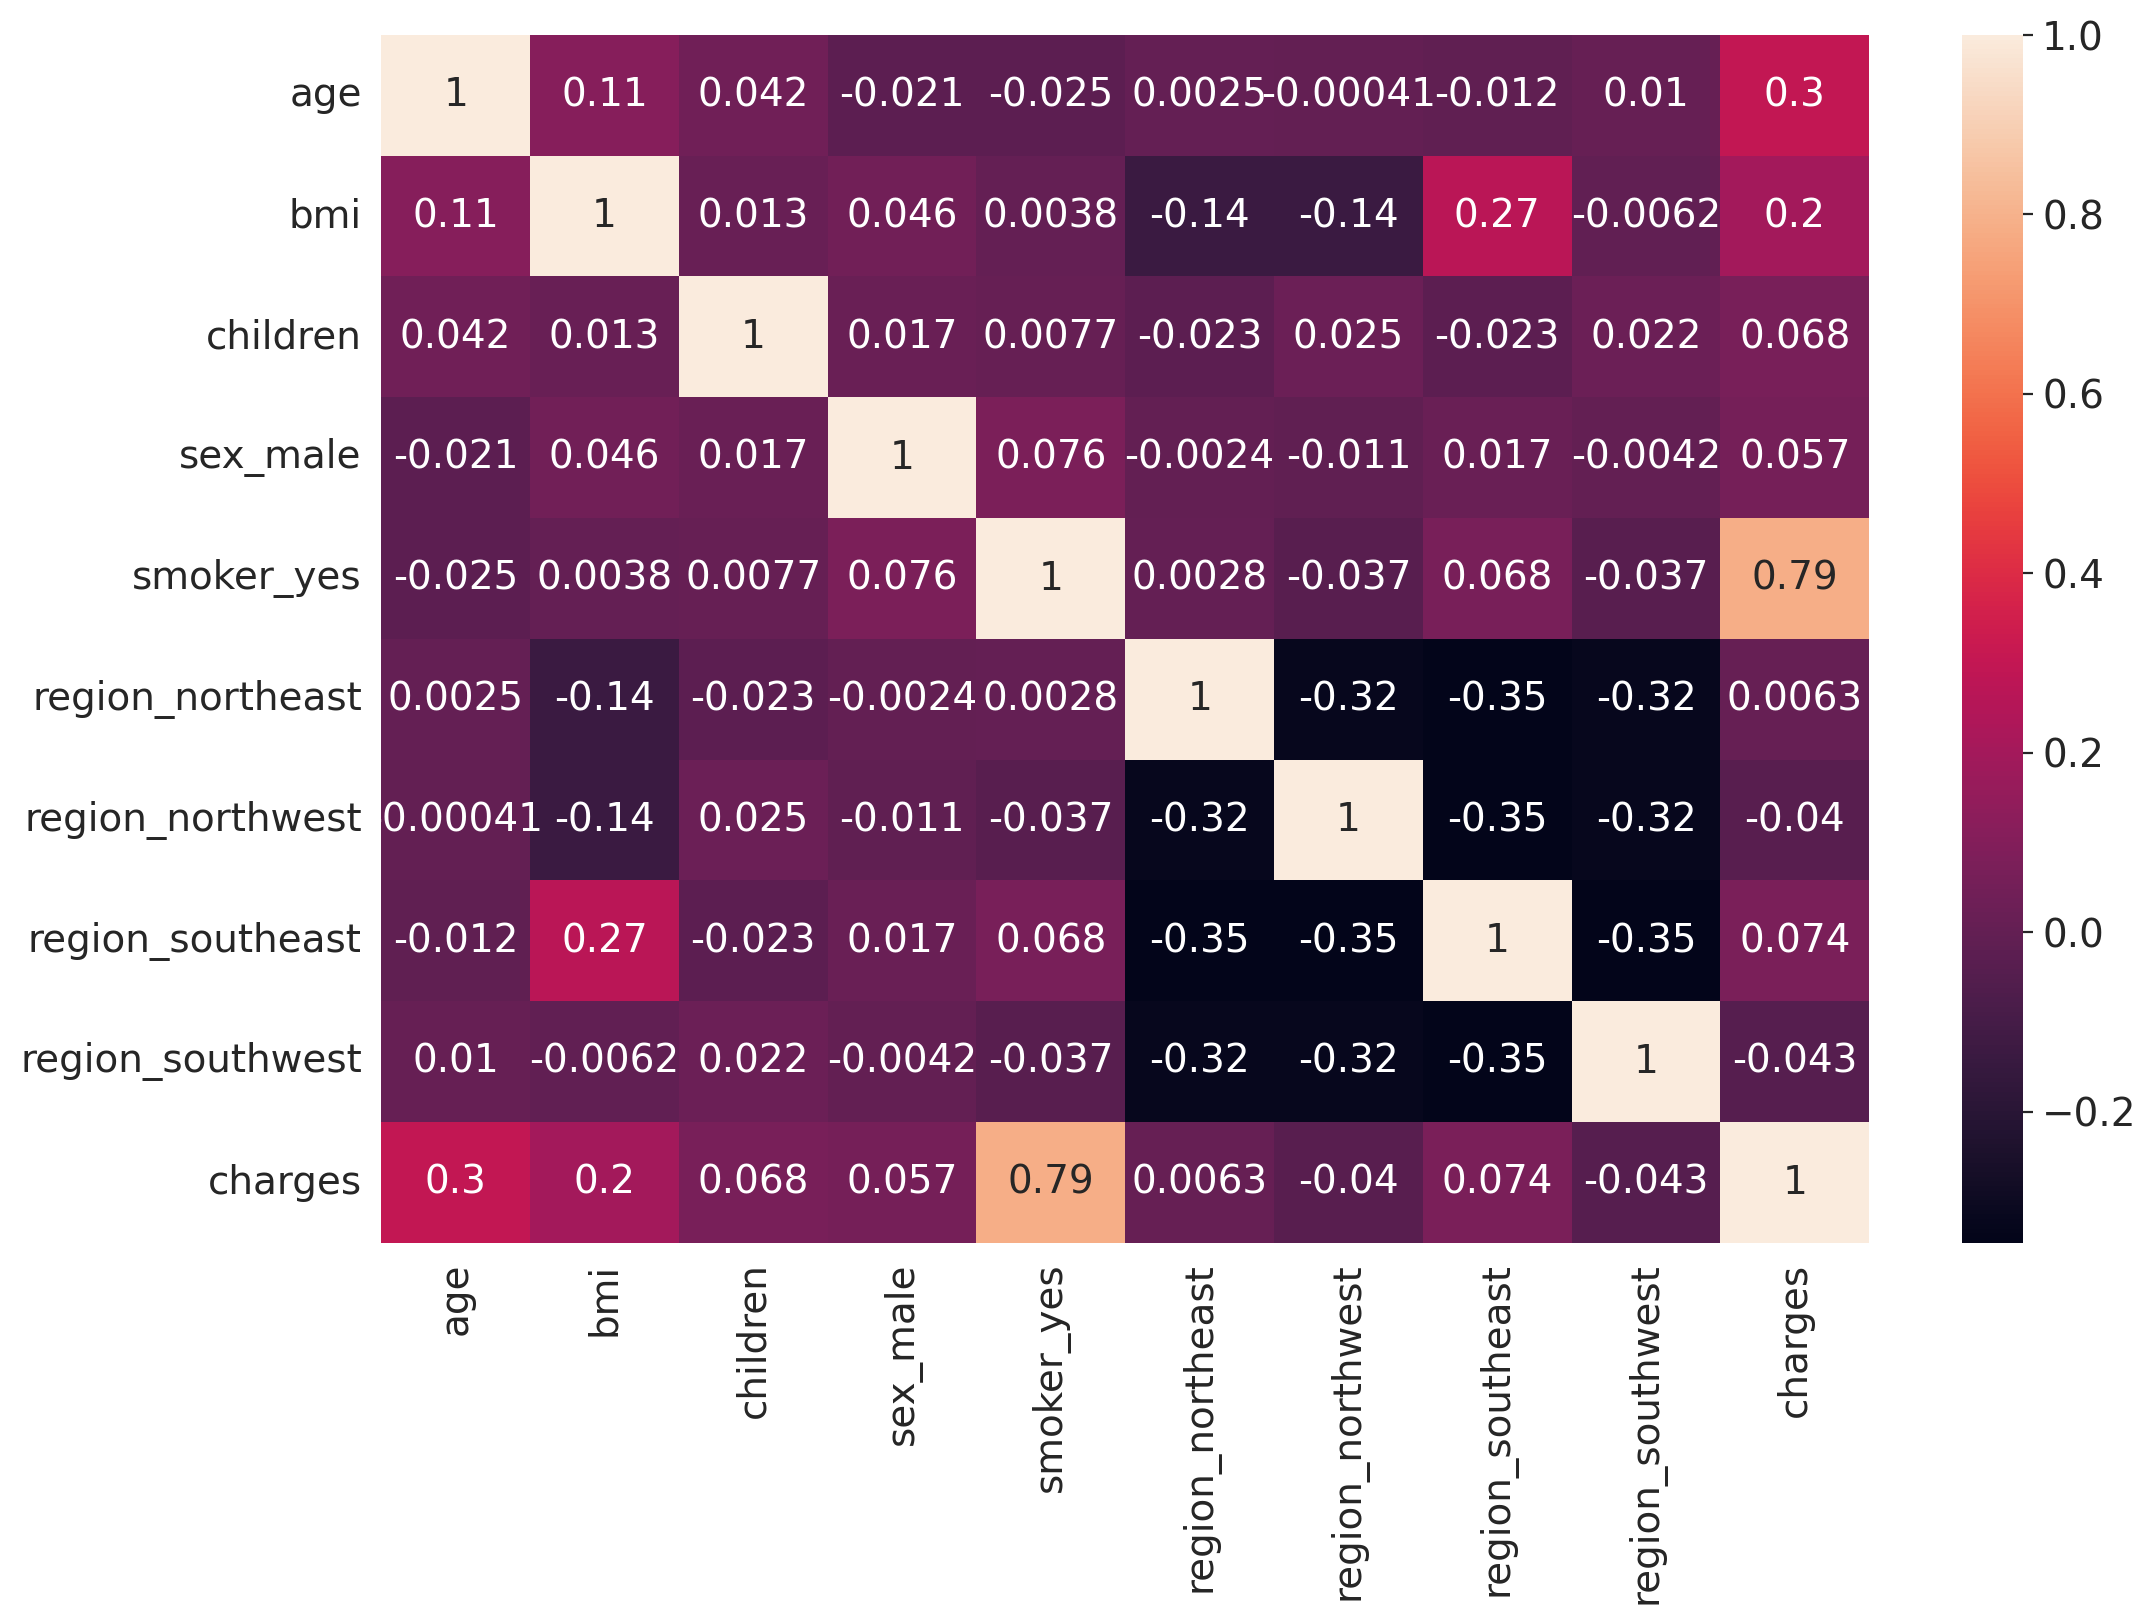

In [75]:
sns.heatmap(new_df.corr(),annot=True)    # smoking correlation is not calculated becoz it is categorical, so lets code it with 0 and 1 for smoker-no and yes

In [76]:
# now lets split the data for training and testing

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

**Linear Regression**

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linear_reg_base = LinearRegression()

linear_reg_base.fit(X_train, y_train)

y_pred_linear_reg_base = linear_reg_base.predict(X_test)

In [81]:
linear_reg_base.score(X_train, y_train)

0.7417255854683333

In [82]:
linear_reg_base.score(X_test, y_test)

0.7835929767120723

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

In [84]:
R2_linear_test = r2_score(y_test, y_pred_linear_reg_base)
R2_linear_test

0.7835929767120723

In [85]:
RMSE_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_base))
RMSE_linear_test

5796.2846592762735

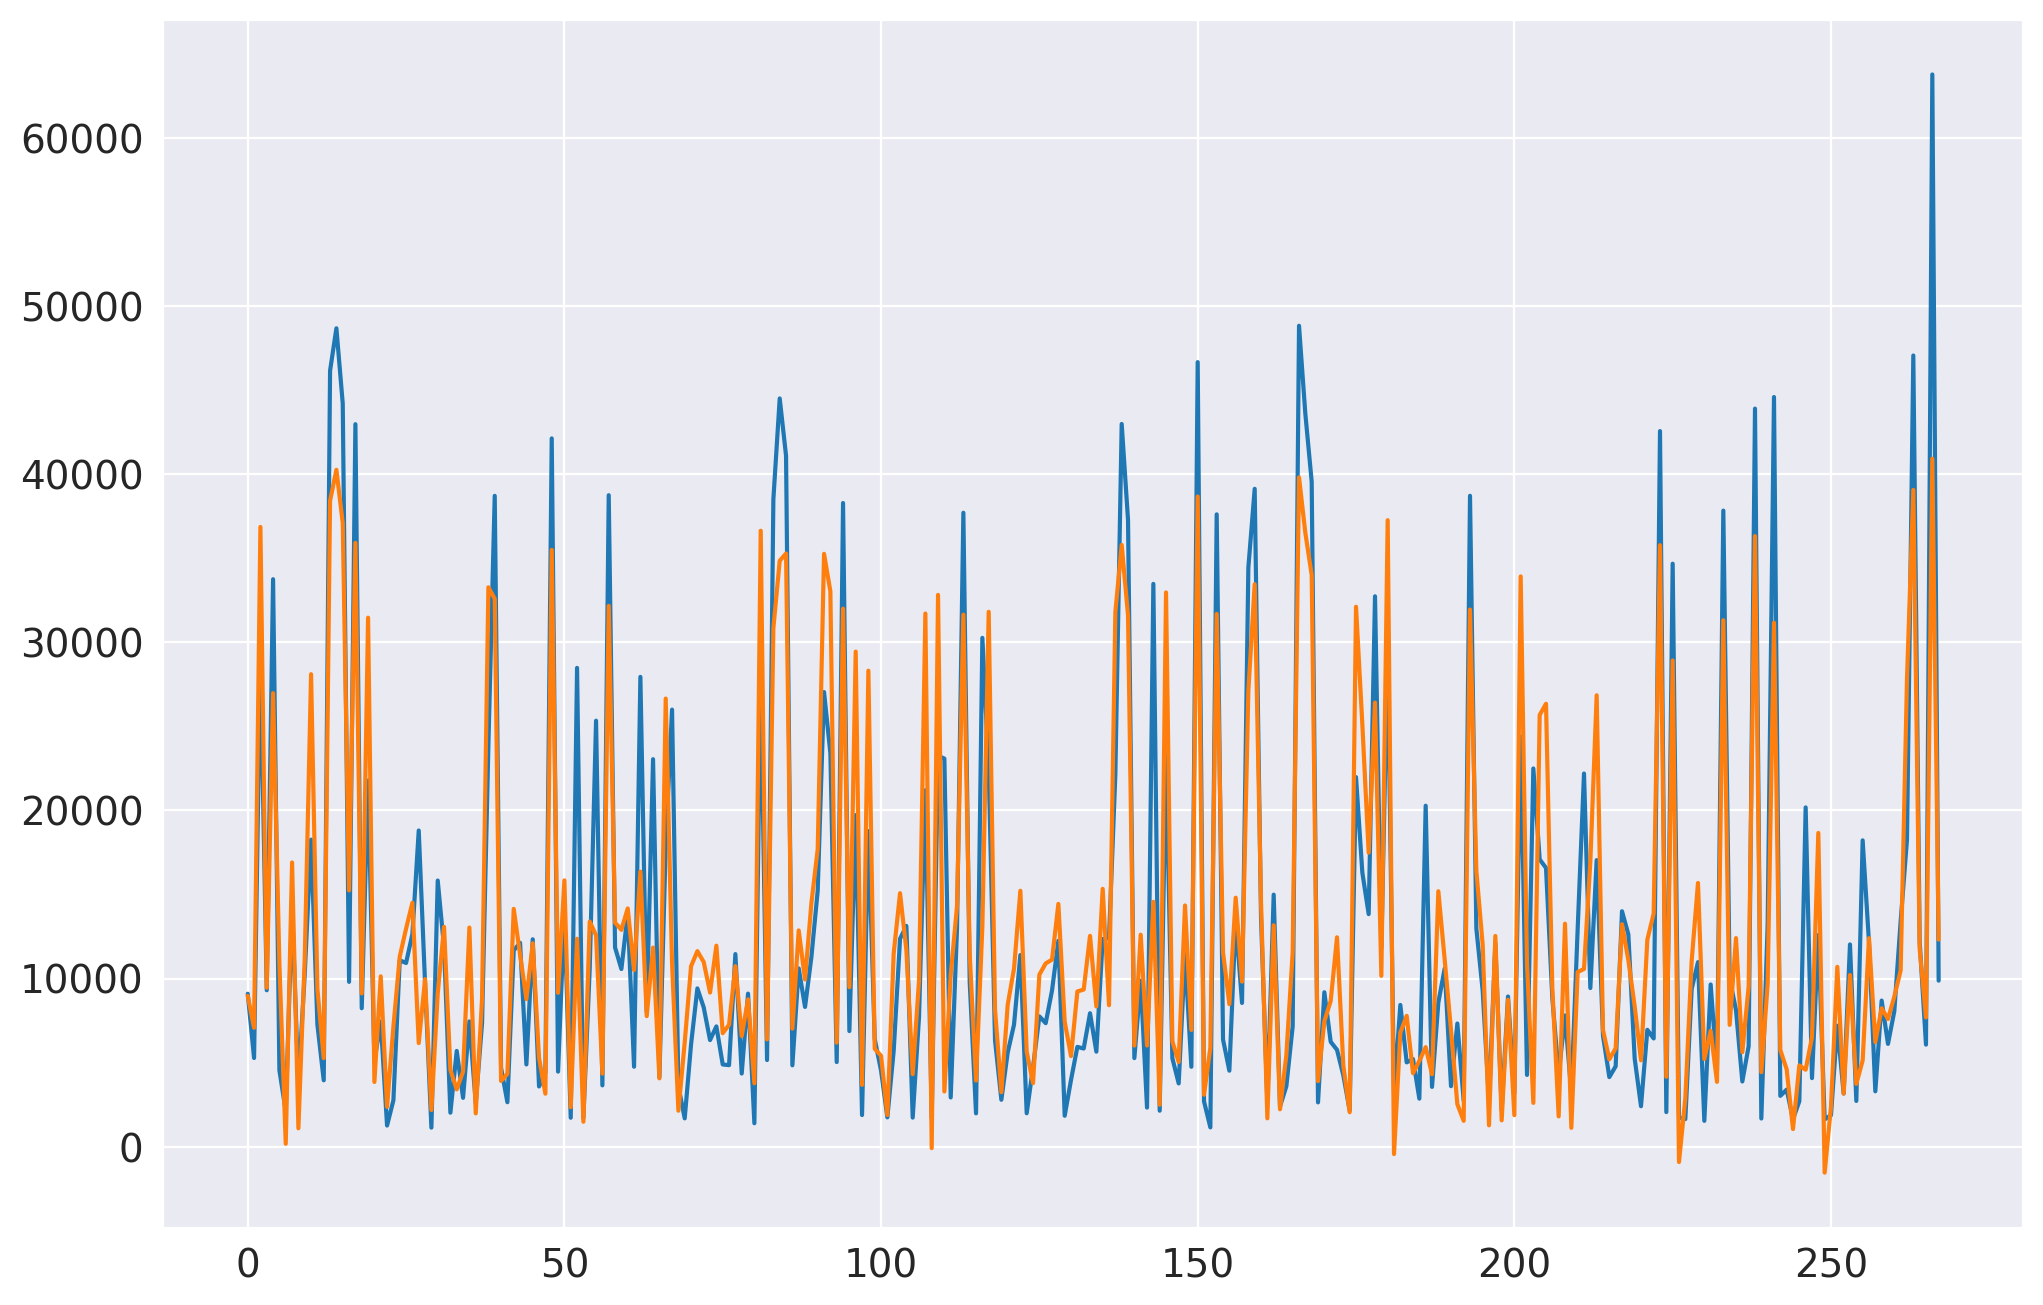

In [86]:
plt.plot(range(268),y_test)
plt.plot(range(268),y_pred_linear_reg_base)

**Elastic Net Regression**

In [87]:
from sklearn.linear_model import ElasticNet

In [88]:
elastic_reg = ElasticNet()

In [89]:
param_grid = {'alpha':[0.1,1,5,10,50,100], 
              'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1]}  # python dictionary with KEYS NAMES EXACTLY MATCHES with PARAMETER NAMES of ElasticNet

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid_model = GridSearchCV(estimator=elastic_reg,
                          param_grid=param_grid,scoring='neg_mean_squared_error',
                          cv=5,verbose=1)

In [92]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
y_pred_elastic_grid = grid_model.predict(X_test)

In [94]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [95]:
R2_elastic_reg = r2_score(y_test, y_pred_elastic_grid)
R2_elastic_reg

0.7796080408480383

In [96]:
RMSE_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_elastic_grid))
RMSE_linear_test

5849.407840912516

In [97]:
# performance of ElasticNet is poor than Linear regression

**K Nearest Neighbours**

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()

scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn = KNeighborsRegressor()   # base model

In [102]:
knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [103]:
y_pred_knn = knn.predict(scaled_X_test)

In [104]:
R2_knn = r2_score(y_test, y_pred_knn)
R2_knn

0.7860203933507237

In [105]:
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
RMSE_knn

5763.684802052312

**Decision Trees**

In [106]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [107]:
R2_dt = r2_score(y_test, y_pred_dt)
R2_dt

0.7450735626670835

**Random Forests**

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
rf = RandomForestRegressor(n_estimators=250)

In [110]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [111]:
R2_rf = r2_score(y_test, y_pred_rf)
R2_rf

0.8626372389564765

In [112]:
RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
RMSE_rf

4617.942659476688

**Adaboost Regression**

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [114]:
adaboost_base = AdaBoostRegressor()

In [115]:
adaboost_base.fit(X_train, y_train)

y_pred_adaboost_base = adaboost_base.predict(X_test)

In [116]:
R2_adaboost_base = r2_score(y_test, y_pred_adaboost_base)
R2_adaboost_base

0.8214861993975764

In [117]:
RMSE_adaboost_base = np.sqrt(mean_squared_error(y_test, y_pred_adaboost_base))
RMSE_adaboost_base

5264.4127020306505

**Gradient Boosting**

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
gradient_boost = GradientBoostingRegressor()

In [120]:
gradient_boost.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost.predict(X_test)

In [121]:
R2_gradient_boost = r2_score(y_test, y_pred_gradient_boost)
R2_gradient_boost

0.8793049408465055

**CONCLUSION:**
    
    Implemented various ML algorithms to predict the insurance payout. Out of all the models, gradient boosting has given an R2 score of 0.8793.